Computer Vision Nanodegree<a href="#Computer-Vision-Nanodegree" class="anchor-link">¶</a>
=========================================================================================

Project: Image Captioning<a href="#Project:-Image-Captioning" class="anchor-link">¶</a>
---------------------------------------------------------------------------------------

------------------------------------------------------------------------

In this notebook, you will train your CNN-RNN model.

You are welcome and encouraged to try out many different architectures
and hyperparameters when searching for a good model.

This does have the potential to make the project quite messy! Before
submitting your project, make sure that you clean up:

-   the code you write in this notebook. The notebook should describe
    how to train a single CNN-RNN architecture, corresponding to your
    final choice of hyperparameters. You should structure the notebook
    so that the reviewer can replicate your results by running the code
    in this notebook.
-   the output of the code cell in **Step 2**. The output should show
    the output obtained when training the model from scratch.

This notebook **will be graded**.

Feel free to use the links below to navigate the notebook:

-   [Step 1](#step1): Training Setup
-   [Step 2](#step2): Train your Model
-   [Step 3](#step3): (Optional) Validate your Model

<span id="step1"></span>

Step 1: Training Setup<a href="#Step-1:-Training-Setup" class="anchor-link">¶</a>
---------------------------------------------------------------------------------

In this step of the notebook, you will customize the training of your
CNN-RNN model by specifying hyperparameters and setting other options
that are important to the training procedure. The values you set now
will be used when training your model in **Step 2** below.

You should only amend blocks of code that are preceded by a `TODO`
statement. **Any code blocks that are not preceded by a `TODO` statement
should not be modified**.

### Task \#1<a href="#Task-#1" class="anchor-link">¶</a>

Begin by setting the following variables:

-   `batch_size` - the batch size of each training batch. It is the
    number of image-caption pairs used to amend the model weights in
    each training step.
-   `vocab_threshold` - the minimum word count threshold. Note that a
    larger threshold will result in a smaller vocabulary, whereas a
    smaller threshold will include rarer words and result in a larger
    vocabulary.
-   `vocab_from_file` - a Boolean that decides whether to load the
    vocabulary from file.
-   `embed_size` - the dimensionality of the image and word embeddings.
-   `hidden_size` - the number of features in the hidden state of the
    RNN decoder.
-   `num_epochs` - the number of epochs to train the model. We recommend
    that you set `num_epochs=3`, but feel free to increase or decrease
    this number as you wish. [This
    paper](https://arxiv.org/pdf/1502.03044.pdf) trained a captioning
    model on a single state-of-the-art GPU for 3 days, but you'll soon
    see that you can get reasonable results in a matter of a few hours!
    (*But of course, if you want your model to compete with current
    research, you will have to train for much longer.*)
-   `save_every` - determines how often to save the model weights. We
    recommend that you set `save_every=1`, to save the model weights
    after each epoch. This way, after the `i`th epoch, the encoder and
    decoder weights will be saved in the `models/` folder as
    `encoder-i.pkl` and `decoder-i.pkl`, respectively.
-   `print_every` - determines how often to print the batch loss to the
    Jupyter notebook while training. Note that you **will not** observe
    a monotonic decrease in the loss function while training - this is
    perfectly fine and completely expected! You are encouraged to keep
    this at its default value of `100` to avoid clogging the notebook,
    but feel free to change it.
-   `log_file` - the name of the text file containing - for every step -
    how the loss and perplexity evolved during training.

If you're not sure where to begin to set some of the values above, you
can peruse [this paper](https://arxiv.org/pdf/1502.03044.pdf) and [this
paper](https://arxiv.org/pdf/1411.4555.pdf) for useful guidance! **To
avoid spending too long on this notebook**, you are encouraged to
consult these suggested research papers to obtain a strong initial guess
for which hyperparameters are likely to work best. Then, train a single
model, and proceed to the next notebook (**3\_Inference.ipynb**). If you
are unhappy with your performance, you can return to this notebook to
tweak the hyperparameters (and/or the architecture in **model.py**) and
re-train your model.

### Question 1<a href="#Question-1" class="anchor-link">¶</a>

**Question:** Describe your CNN-RNN architecture in detail. With this
architecture in mind, how did you select the values of the variables in
Task 1? If you consulted a research paper detailing a successful
implementation of an image captioning model, please provide the
reference.

**Answer:**

For the encoder, it has a CNN structure, the architecture of which
includes the ResNet-50 pretrained on the ImageNet dataset. From the
pretrained network, the image features are extracted and passed through
the last fully connected layer with its output having the equivalent
size as the word embeddings.

As for the decoder, it has a RNN structure consisting of one embedding
layer(transforming the input image features and captions into
embeddings), one LSTM layer with one hiddenlayer, and one fully
connected layer(mapping the hidden state's output into the vocab\_size).

(Reference: Oriol Vinyals et al., Show and Tell: A Neural Image Caption
Generator, CVPR 2015.)

### (Optional) Task \#2<a href="#(Optional)-Task-#2" class="anchor-link">¶</a>

Note that we have provided a recommended image transform
`transform_train` for pre-processing the training images, but you are
welcome (and encouraged!) to modify it as you wish. When modifying this
transform, keep in mind that:

-   the images in the dataset have varying heights and widths, and
-   if using a pre-trained model, you must perform the corresponding
    appropriate normalization.

### Question 2<a href="#Question-2" class="anchor-link">¶</a>

**Question:** How did you select the transform in `transform_train`? If
you left the transform at its provided value, why do you think that it
is a good choice for your CNN architecture?

**Answer:**

The provided values were used in transfrom\_train since a enoughly large
number of images were available online, images.cocodataset.org. Although
data augmentations are used in many cases to artificially make more data
available, to improve the model performances, and to reduce the
overfitting, it is not particularly advised to utilize some aggresive
augmentation strategies for the cases that a very large amount of data
is available. It should also be noted that data augmentation can
decrease the model performance in that distorted data by augmentations
can greatly differ from real data that is what we really want to train.
In this regard, more aggresive augmentations are not additionally
implemented here, just nearly staying with the default transformations.

### Task \#3<a href="#Task-#3" class="anchor-link">¶</a>

Next, you will specify a Python list containing the learnable parameters
of the model. For instance, if you decide to make all weights in the
decoder trainable, but only want to train the weights in the embedding
layer of the encoder, then you should set `params` to something like:

    params = list(decoder.parameters()) + list(encoder.embed.parameters())

### Question 3<a href="#Question-3" class="anchor-link">¶</a>

**Question:** How did you select the trainable parameters of your
architecture? Why do you think this is a good choice?

**Answer:**

Using the encoder pretrained on the ImageNet dataset, the transfer
learning was applied to train the encoder - only the last fully
connected layer was directly trained. Since we deal with simliar kinds
of images to the images in the ImageNet dataset, it is natural to go on
the transfer learning approach(can expect a better convergence within
much less time). For the decoder, it would also be possible to apply a
similar approach to train the model; however, I did not especially apply
the transfer learning for the decoder but train all the parameters of
the decoder. Actually, the decoder has a RNN structure, not having a CNN
structure as the encoder. Also, the number of the trainable parameters
of the decoder is relatively much smaller than the trainable parameters
of the encoder. For these reasons, it was concluded that there's no need
to put much effort into transfer learning to train the decoder.

### Task \#4<a href="#Task-#4" class="anchor-link">¶</a>

Finally, you will select an
[optimizer](http://pytorch.org/docs/master/optim.html#torch.optim.Optimizer).

### Question 4<a href="#Question-4" class="anchor-link">¶</a>

**Question:** How did you select the optimizer used to train your model?

**Answer:**

The reason why Adam is simply chosen as the optimizer here is that Adam
has performed reasonably well in almost all cases in my
experiences(often considered as a standard choice and as one of the most
efficient optimizers). Adam optimizer adaptively tweaks the learning
rate with a less chance to be stuck in a local minima than would be the
case if SGD were used as an optimiezer. Of course, it is still possible
to try several other optimizers for training to improve the performance
to some extent.

In \[1\]:

    # Path. cocoapi images
    # /opt/cocoapi/images/train2014/
    # /opt/cocoapi/images/test2014/
    # /opt/cocoapi/images/val2014/

In \[1\]:

    import torch
    import torch.nn as nn
    from torchvision import transforms
    import sys
    sys.path.append('/opt/cocoapi/PythonAPI')
    from pycocotools.coco import COCO
    from data_loader_with_validation import get_loader
    from model import EncoderCNN, DecoderRNN

    import os, math, nltk, logging
    import numpy as np
    import matplotlib.pyplot as plt
    import torch.utils.data as data
    from nltk.translate.bleu_score import sentence_bleu
    from nltk.tokenize import word_tokenize

    TRY_MULTI_GPUS = False

    ## TODO #1: Select appropriate values for the Python variables below.
    batch_size = 512          # batch size
    vocab_threshold = 5        # minimum word count threshold
    vocab_from_file = True  # if True, load existing vocab file
    embed_size = 512           # dimensionality of image and word embeddings
    hidden_size = 512          # number of features in hidden state of the RNN decoder
    num_epochs = 5            # number of training epochs
    save_every = 1             # determines frequency of saving model weights
    print_every = 1          # determines window for printing average loss
    log_file = 'training_log.txt'       # name of file with saved training loss and perplexity

    # (Optional) TODO #2: Amend the image transform below.
    transform_train = transforms.Compose([ 
        transforms.Resize(256),                          # smaller edge of image resized to 256
        transforms.RandomCrop(224),                      # get 224x224 crop from random location
        transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
        transforms.ToTensor(),                           # convert the PIL Image to a tensor
        transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                             (0.229, 0.224, 0.225))])

    # Add validation tranforms
    transform_val = transforms.Compose([ 
        transforms.Resize(256),                          # smaller edge of image resized to 256
        transforms.RandomCrop(224),                      # get 224x224 crop from random location
        transforms.ToTensor(),                           # convert the PIL Image to a tensor
        transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                             (0.229, 0.224, 0.225))])

    # Build data loader.
    data_loader = get_loader(transform=transform_train,
                             mode='train',
                             batch_size=batch_size,
                             vocab_threshold=vocab_threshold,
                             vocab_from_file=vocab_from_file)

    val_data_loader = get_loader(transform=transform_val, 
                             mode='val')

    # The size of the vocabulary.
    vocab_size = len(data_loader.dataset.vocab)

    # Initialize the encoder and decoder. 
    encoder = EncoderCNN(embed_size)
    decoder = DecoderRNN(embed_size, hidden_size, vocab_size)

    # Move models to GPU if CUDA is available. 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder.to(device)
    decoder.to(device)

    # Define the loss function. 
    criterion = nn.CrossEntropyLoss().cuda() if torch.cuda.is_available() else nn.CrossEntropyLoss()

    # TODO #3: Specify the learnable parameters of the model.
    params = list(decoder.parameters())
    params += list(encoder.embed.parameters()) 

    if TRY_MULTI_GPUS:
        if torch.cuda.device_count() > 1:    
            encoder = nn.DataParallel(encoder)
            decoder = nn.DataParallel(decoder)
            encoder.to(device)
            decoder.to(device)

    # TODO #4: Define the optimizer.
    optimizer = torch.optim.Adam(params, lr=1e-3, betas=(0.9, 0.999), eps=1e-08)

    # Set the total number of training steps per epoch.
    total_step = math.ceil(len(data_loader.dataset.caption_lengths) / data_loader.batch_sampler.batch_size)

    Vocabulary successfully loaded from vocab.pkl file!
    loading annotations into memory...
    Done (t=0.89s)
    creating index...

      0%|          | 437/414113 [00:00<01:34, 4365.37it/s]

    index created!
    Obtaining caption lengths...

    100%|██████████| 414113/414113 [01:27<00:00, 4720.66it/s]

    Vocabulary successfully loaded from vocab.pkl file!
    loading annotations into memory...
    Done (t=0.39s)
    creating index...
    index created!

<span id="step2"></span>

Step 2: Train your Model<a href="#Step-2:-Train-your-Model" class="anchor-link">¶</a>
-------------------------------------------------------------------------------------

Once you have executed the code cell in **Step 1**, the training
procedure below should run without issue.

It is completely fine to leave the code cell below as-is without
modifications to train your model. However, if you would like to modify
the code used to train the model below, you must ensure that your
changes are easily parsed by your reviewer. In other words, make sure to
provide appropriate comments to describe how your code works!

You may find it useful to load saved weights to resume training. In that
case, note the names of the files containing the encoder and decoder
weights that you'd like to load (`encoder_file` and `decoder_file`).
Then you can load the weights by using the lines below:

    # Load pre-trained weights before resuming training.
    encoder.load_state_dict(torch.load(os.path.join('./models', encoder_file)))
    decoder.load_state_dict(torch.load(os.path.join('./models', decoder_file)))

While trying out parameters, make sure to take extensive notes and
record the settings that you used in your various training runs. In
particular, you don't want to encounter a situation where you've trained
a model for several hours but can't remember what settings you used :).

### A Note on Tuning Hyperparameters<a href="#A-Note-on-Tuning-Hyperparameters" class="anchor-link">¶</a>

To figure out how well your model is doing, you can look at how the
training loss and perplexity evolve during training - and for the
purposes of this project, you are encouraged to amend the
hyperparameters based on this information.

However, this will not tell you if your model is overfitting to the
training data, and, unfortunately, overfitting is a problem that is
commonly encountered when training image captioning models.

For this project, you need not worry about overfitting. **This project
does not have strict requirements regarding the performance of your
model**, and you just need to demonstrate that your model has learned
***something*** when you generate captions on the test data. For now, we
strongly encourage you to train your model for the suggested 3 epochs
without worrying about performance; then, you should immediately
transition to the next notebook in the sequence (**3\_Inference.ipynb**)
to see how your model performs on the test data. If your model needs to
be changed, you can come back to this notebook, amend hyperparameters
(if necessary), and re-train the model.

That said, if you would like to go above and beyond in this project, you
can read about some approaches to minimizing overfitting in section
4.3.1 of [this
paper](http://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7505636). In
the next (optional) step of this notebook, we provide some guidance for
assessing the performance on the validation dataset.

In \[2\]:

    encoder_file = 'encoder.pkl'
    decoder_file = 'decoder.pkl'

    # Load pre-trained weights before resuming training.
    encoder.load_state_dict(torch.load(os.path.join('models', encoder_file)))
    decoder.load_state_dict(torch.load(os.path.join('models', decoder_file)))

In \[8\]:

    # Init Logger
    logger = logging.getLogger('logger_training')
    logger.setLevel(logging.INFO)
    for handler in logger.handlers: logger.removeHandler(handler)

    # Define Logger
    logger = logging.getLogger('logger_training')
    formatter = logging.Formatter('%(asctime)s | %(name)s | %(levelname)s: %(message)s')

    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(formatter)

    file_handler = logging.FileHandler(filename=log_file)
    file_handler.setFormatter(formatter)

    logger.addHandler(stream_handler)
    logger.addHandler(file_handler)

In \[10\]:

    num_epochs = 1
    prev_perplexity = sys.maxsize

    for epoch in range(1, num_epochs + 1):
        for step in range(1, total_step + 1):
            data_loader.batch_sampler.sampler = data.sampler.SubsetRandomSampler(indices=data_loader.dataset.get_train_indices())

            images, captions = next(iter(data_loader))
            images = images.to(device)
            captions = captions.to(device)

            decoder.zero_grad()
            encoder.zero_grad()

            loss = criterion(decoder(encoder(images), captions).view(-1, vocab_size), captions.view(-1))
            loss.backward()

            optimizer.step()

            if step % print_every == 0:
                msg = 'Epoch [%d/%d]\t Step [%d/%d]\t Loss: %.4f\t Perplexity: %5.4f ' % (epoch, num_epochs, step, total_step, loss.item(), np.exp(loss.item()))
                logger.info(msg)

            perplexity = np.exp(loss.item())
        # if epoch % save_every == 0:
            if perplexity <= prev_perplexity:        
                prev_perplexity = perplexity
                try:
                    torch.save(decoder.state_dict(), os.path.join('./models', 'decoder_new.pkl'))
                    torch.save(encoder.state_dict(), os.path.join('./models', 'encoder_new.pkl'))
                    torch.save({'model': decoder.state_dict(), 'optimizer': optimizer.state_dict()}, os.path.join('./models', 'all_decoder_new.tar'))
                    torch.save({'model': encoder.state_dict(), 'optimizer': optimizer.state_dict()}, os.path.join('./models', 'all_encoder_new.tar'))
                    logger.info('Model saved with perplexity: ' + str(perplexity))
                except:
                    logger.error('Failed to save model.')

    2021-08-28 05:37:36,123 | logger_training | INFO: Epoch [1/1]   Step [1/809]    Loss: 1.8533    Perplexity: 6.3806 
    2021-08-28 05:37:36,785 | logger_training | INFO: Model saved with perplexity: 6.38059803223
    2021-08-28 05:37:47,012 | logger_training | INFO: Epoch [1/1]    Step [2/809]    Loss: 1.9815    Perplexity: 7.2536 
    2021-08-28 05:37:57,377 | logger_training | INFO: Epoch [1/1]    Step [3/809]    Loss: 1.8372    Perplexity: 6.2790 
    2021-08-28 05:37:58,013 | logger_training | INFO: Model saved with perplexity: 6.27902721214
    2021-08-28 05:38:08,234 | logger_training | INFO: Epoch [1/1]    Step [4/809]    Loss: 1.9089    Perplexity: 6.7455 
    2021-08-28 05:38:18,459 | logger_training | INFO: Epoch [1/1]    Step [5/809]    Loss: 1.8165    Perplexity: 6.1502 
    2021-08-28 05:38:19,119 | logger_training | INFO: Model saved with perplexity: 6.15021960403
    2021-08-28 05:38:29,411 | logger_training | INFO: Epoch [1/1]    Step [6/809]    Loss: 2.4466    Perplexity: 11.5495 
    2021-08-28 05:38:39,751 | logger_training | INFO: Epoch [1/1]    Step [7/809]    Loss: 1.9120    Perplexity: 6.7665 
    2021-08-28 05:38:49,970 | logger_training | INFO: Epoch [1/1]    Step [8/809]    Loss: 1.8934    Perplexity: 6.6422 
    2021-08-28 05:39:00,116 | logger_training | INFO: Epoch [1/1]    Step [9/809]    Loss: 1.8803    Perplexity: 6.5556 
    2021-08-28 05:39:10,288 | logger_training | INFO: Epoch [1/1]    Step [10/809]   Loss: 1.9421    Perplexity: 6.9733 
    2021-08-28 05:39:20,411 | logger_training | INFO: Epoch [1/1]    Step [11/809]   Loss: 1.8419    Perplexity: 6.3086 
    2021-08-28 05:39:30,529 | logger_training | INFO: Epoch [1/1]    Step [12/809]   Loss: 1.9453    Perplexity: 6.9955 
    2021-08-28 05:39:40,703 | logger_training | INFO: Epoch [1/1]    Step [13/809]   Loss: 1.8673    Perplexity: 6.4711 
    2021-08-28 05:39:50,794 | logger_training | INFO: Epoch [1/1]    Step [14/809]   Loss: 1.9102    Perplexity: 6.7543 
    2021-08-28 05:40:00,855 | logger_training | INFO: Epoch [1/1]    Step [15/809]   Loss: 1.9025    Perplexity: 6.7030 
    2021-08-28 05:40:10,968 | logger_training | INFO: Epoch [1/1]    Step [16/809]   Loss: 1.8361    Perplexity: 6.2718 
    2021-08-28 05:40:21,099 | logger_training | INFO: Epoch [1/1]    Step [17/809]   Loss: 1.8719    Perplexity: 6.5004 
    2021-08-28 05:40:31,231 | logger_training | INFO: Epoch [1/1]    Step [18/809]   Loss: 1.8523    Perplexity: 6.3742 
    2021-08-28 05:40:41,265 | logger_training | INFO: Epoch [1/1]    Step [19/809]   Loss: 2.1563    Perplexity: 8.6389 
    2021-08-28 05:40:51,365 | logger_training | INFO: Epoch [1/1]    Step [20/809]   Loss: 1.9413    Perplexity: 6.9681 
    2021-08-28 05:41:01,498 | logger_training | INFO: Epoch [1/1]    Step [21/809]   Loss: 2.1309    Perplexity: 8.4222 
    2021-08-28 05:41:11,722 | logger_training | INFO: Epoch [1/1]    Step [22/809]   Loss: 1.8658    Perplexity: 6.4613 
    2021-08-28 05:41:21,803 | logger_training | INFO: Epoch [1/1]    Step [23/809]   Loss: 2.1599    Perplexity: 8.6705 
    2021-08-28 05:41:31,880 | logger_training | INFO: Epoch [1/1]    Step [24/809]   Loss: 1.9240    Perplexity: 6.8480 
    2021-08-28 05:41:42,088 | logger_training | INFO: Epoch [1/1]    Step [25/809]   Loss: 1.8812    Perplexity: 6.5616 
    2021-08-28 05:41:52,209 | logger_training | INFO: Epoch [1/1]    Step [26/809]   Loss: 1.7896    Perplexity: 5.9868 
    2021-08-28 05:41:52,846 | logger_training | INFO: Model saved with perplexity: 5.98682815498
    2021-08-28 05:42:02,982 | logger_training | INFO: Epoch [1/1]    Step [27/809]   Loss: 1.8309    Perplexity: 6.2393 
    2021-08-28 05:42:13,034 | logger_training | INFO: Epoch [1/1]    Step [28/809]   Loss: 1.8046    Perplexity: 6.0777 
    2021-08-28 05:42:23,228 | logger_training | INFO: Epoch [1/1]    Step [29/809]   Loss: 1.8560    Perplexity: 6.3984 
    2021-08-28 05:42:33,260 | logger_training | INFO: Epoch [1/1]    Step [30/809]   Loss: 1.8500    Perplexity: 6.3600 
    2021-08-28 05:42:43,317 | logger_training | INFO: Epoch [1/1]    Step [31/809]   Loss: 1.8546    Perplexity: 6.3890 
    2021-08-28 05:42:53,439 | logger_training | INFO: Epoch [1/1]    Step [32/809]   Loss: 1.8646    Perplexity: 6.4532 
    2021-08-28 05:43:03,368 | logger_training | INFO: Epoch [1/1]    Step [33/809]   Loss: 2.0010    Perplexity: 7.3962 
    2021-08-28 05:43:13,510 | logger_training | INFO: Epoch [1/1]    Step [34/809]   Loss: 1.8895    Perplexity: 6.6163 
    2021-08-28 05:43:23,473 | logger_training | INFO: Epoch [1/1]    Step [35/809]   Loss: 2.0382    Perplexity: 7.6766 
    2021-08-28 05:43:33,488 | logger_training | INFO: Epoch [1/1]    Step [36/809]   Loss: 1.9159    Perplexity: 6.7932 
    2021-08-28 05:43:43,574 | logger_training | INFO: Epoch [1/1]    Step [37/809]   Loss: 1.8083    Perplexity: 6.1003 
    2021-08-28 05:43:53,682 | logger_training | INFO: Epoch [1/1]    Step [38/809]   Loss: 1.9447    Perplexity: 6.9916 
    2021-08-28 05:44:03,818 | logger_training | INFO: Epoch [1/1]    Step [39/809]   Loss: 1.8258    Perplexity: 6.2080 
    2021-08-28 05:44:13,938 | logger_training | INFO: Epoch [1/1]    Step [40/809]   Loss: 1.9667    Perplexity: 7.1474 
    2021-08-28 05:44:23,932 | logger_training | INFO: Epoch [1/1]    Step [41/809]   Loss: 1.9274    Perplexity: 6.8715 
    2021-08-28 05:44:33,983 | logger_training | INFO: Epoch [1/1]    Step [42/809]   Loss: 1.8057    Perplexity: 6.0841 
    2021-08-28 05:44:43,899 | logger_training | INFO: Epoch [1/1]    Step [43/809]   Loss: 1.7948    Perplexity: 6.0186 
    2021-08-28 05:44:53,962 | logger_training | INFO: Epoch [1/1]    Step [44/809]   Loss: 1.9650    Perplexity: 7.1351 
    2021-08-28 05:45:03,901 | logger_training | INFO: Epoch [1/1]    Step [45/809]   Loss: 1.8958    Perplexity: 6.6582 
    2021-08-28 05:45:13,897 | logger_training | INFO: Epoch [1/1]    Step [46/809]   Loss: 1.8371    Perplexity: 6.2785 
    2021-08-28 05:45:24,036 | logger_training | INFO: Epoch [1/1]    Step [47/809]   Loss: 1.8616    Perplexity: 6.4342 
    2021-08-28 05:45:34,078 | logger_training | INFO: Epoch [1/1]    Step [48/809]   Loss: 2.0597    Perplexity: 7.8440 
    2021-08-28 05:45:44,272 | logger_training | INFO: Epoch [1/1]    Step [49/809]   Loss: 1.8711    Perplexity: 6.4953 
    2021-08-28 05:45:54,544 | logger_training | INFO: Epoch [1/1]    Step [50/809]   Loss: 1.8803    Perplexity: 6.5556 
    2021-08-28 05:46:04,615 | logger_training | INFO: Epoch [1/1]    Step [51/809]   Loss: 1.8411    Perplexity: 6.3036 
    2021-08-28 05:46:14,900 | logger_training | INFO: Epoch [1/1]    Step [52/809]   Loss: 1.9004    Perplexity: 6.6883 
    2021-08-28 05:46:25,124 | logger_training | INFO: Epoch [1/1]    Step [53/809]   Loss: 1.8217    Perplexity: 6.1827 
    2021-08-28 05:46:35,366 | logger_training | INFO: Epoch [1/1]    Step [54/809]   Loss: 1.8433    Perplexity: 6.3175 
    2021-08-28 05:46:45,691 | logger_training | INFO: Epoch [1/1]    Step [55/809]   Loss: 2.0965    Perplexity: 8.1380 
    2021-08-28 05:46:55,877 | logger_training | INFO: Epoch [1/1]    Step [56/809]   Loss: 1.8604    Perplexity: 6.4262 
    2021-08-28 05:47:05,941 | logger_training | INFO: Epoch [1/1]    Step [57/809]   Loss: 1.8232    Perplexity: 6.1914 
    2021-08-28 05:47:16,167 | logger_training | INFO: Epoch [1/1]    Step [58/809]   Loss: 1.9129    Perplexity: 6.7724 
    2021-08-28 05:47:26,374 | logger_training | INFO: Epoch [1/1]    Step [59/809]   Loss: 1.8584    Perplexity: 6.4133 
    2021-08-28 05:47:36,669 | logger_training | INFO: Epoch [1/1]    Step [60/809]   Loss: 1.8570    Perplexity: 6.4047 
    2021-08-28 05:47:47,050 | logger_training | INFO: Epoch [1/1]    Step [61/809]   Loss: 1.8556    Perplexity: 6.3958 
    2021-08-28 05:47:57,317 | logger_training | INFO: Epoch [1/1]    Step [62/809]   Loss: 1.8828    Perplexity: 6.5718 
    2021-08-28 05:48:07,563 | logger_training | INFO: Epoch [1/1]    Step [63/809]   Loss: 2.7289    Perplexity: 15.3167 
    2021-08-28 05:48:17,786 | logger_training | INFO: Epoch [1/1]    Step [64/809]   Loss: 2.1265    Perplexity: 8.3858 
    2021-08-28 05:48:28,064 | logger_training | INFO: Epoch [1/1]    Step [65/809]   Loss: 1.8884    Perplexity: 6.6085 
    2021-08-28 05:48:38,163 | logger_training | INFO: Epoch [1/1]    Step [66/809]   Loss: 1.8037    Perplexity: 6.0721 
    2021-08-28 05:48:48,380 | logger_training | INFO: Epoch [1/1]    Step [67/809]   Loss: 1.8986    Perplexity: 6.6767 
    2021-08-28 05:48:58,462 | logger_training | INFO: Epoch [1/1]    Step [68/809]   Loss: 1.9462    Perplexity: 7.0020 
    2021-08-28 05:49:08,392 | logger_training | INFO: Epoch [1/1]    Step [69/809]   Loss: 1.8228    Perplexity: 6.1894 
    2021-08-28 05:49:18,586 | logger_training | INFO: Epoch [1/1]    Step [70/809]   Loss: 2.2077    Perplexity: 9.0947 
    2021-08-28 05:49:28,584 | logger_training | INFO: Epoch [1/1]    Step [71/809]   Loss: 1.8522    Perplexity: 6.3738 
    2021-08-28 05:49:38,767 | logger_training | INFO: Epoch [1/1]    Step [72/809]   Loss: 1.8475    Perplexity: 6.3442 
    2021-08-28 05:49:48,911 | logger_training | INFO: Epoch [1/1]    Step [73/809]   Loss: 2.3027    Perplexity: 10.0014 
    2021-08-28 05:49:59,129 | logger_training | INFO: Epoch [1/1]    Step [74/809]   Loss: 2.1906    Perplexity: 8.9403 
    2021-08-28 05:50:09,298 | logger_training | INFO: Epoch [1/1]    Step [75/809]   Loss: 1.8678    Perplexity: 6.4740 
    2021-08-28 05:50:19,454 | logger_training | INFO: Epoch [1/1]    Step [76/809]   Loss: 1.9313    Perplexity: 6.8982 
    2021-08-28 05:50:29,428 | logger_training | INFO: Epoch [1/1]    Step [77/809]   Loss: 1.8361    Perplexity: 6.2723 
    2021-08-28 05:50:39,367 | logger_training | INFO: Epoch [1/1]    Step [78/809]   Loss: 2.1895    Perplexity: 8.9311 
    2021-08-28 05:50:49,371 | logger_training | INFO: Epoch [1/1]    Step [79/809]   Loss: 2.3072    Perplexity: 10.0468 
    2021-08-28 05:50:59,545 | logger_training | INFO: Epoch [1/1]    Step [80/809]   Loss: 2.2165    Perplexity: 9.1751 
    2021-08-28 05:51:09,618 | logger_training | INFO: Epoch [1/1]    Step [81/809]   Loss: 1.8467    Perplexity: 6.3391 
    2021-08-28 05:51:19,689 | logger_training | INFO: Epoch [1/1]    Step [82/809]   Loss: 1.8595    Perplexity: 6.4207 
    2021-08-28 05:51:29,616 | logger_training | INFO: Epoch [1/1]    Step [83/809]   Loss: 1.9874    Perplexity: 7.2966 
    2021-08-28 05:51:39,597 | logger_training | INFO: Epoch [1/1]    Step [84/809]   Loss: 1.8704    Perplexity: 6.4909 
    2021-08-28 05:51:49,709 | logger_training | INFO: Epoch [1/1]    Step [85/809]   Loss: 1.8945    Perplexity: 6.6492 
    2021-08-28 05:51:59,849 | logger_training | INFO: Epoch [1/1]    Step [86/809]   Loss: 1.8918    Perplexity: 6.6314 
    2021-08-28 05:52:10,044 | logger_training | INFO: Epoch [1/1]    Step [87/809]   Loss: 2.8820    Perplexity: 17.8505 
    2021-08-28 05:52:20,014 | logger_training | INFO: Epoch [1/1]    Step [88/809]   Loss: 1.8739    Perplexity: 6.5140 
    2021-08-28 05:52:29,852 | logger_training | INFO: Epoch [1/1]    Step [89/809]   Loss: 2.1950    Perplexity: 8.9799 
    2021-08-28 05:52:39,972 | logger_training | INFO: Epoch [1/1]    Step [90/809]   Loss: 2.5244    Perplexity: 12.4833 
    2021-08-28 05:52:50,115 | logger_training | INFO: Epoch [1/1]    Step [91/809]   Loss: 2.0903    Perplexity: 8.0874 
    2021-08-28 05:53:00,376 | logger_training | INFO: Epoch [1/1]    Step [92/809]   Loss: 1.8134    Perplexity: 6.1314 
    2021-08-28 05:53:10,481 | logger_training | INFO: Epoch [1/1]    Step [93/809]   Loss: 1.8599    Perplexity: 6.4230 
    2021-08-28 05:53:20,502 | logger_training | INFO: Epoch [1/1]    Step [94/809]   Loss: 1.8936    Perplexity: 6.6430 
    2021-08-28 05:53:30,637 | logger_training | INFO: Epoch [1/1]    Step [95/809]   Loss: 1.8610    Perplexity: 6.4304 
    2021-08-28 05:53:40,812 | logger_training | INFO: Epoch [1/1]    Step [96/809]   Loss: 1.9720    Perplexity: 7.1847 
    2021-08-28 05:53:50,914 | logger_training | INFO: Epoch [1/1]    Step [97/809]   Loss: 2.0792    Perplexity: 7.9984 
    2021-08-28 05:54:01,063 | logger_training | INFO: Epoch [1/1]    Step [98/809]   Loss: 1.8497    Perplexity: 6.3578 
    2021-08-28 05:54:11,077 | logger_training | INFO: Epoch [1/1]    Step [99/809]   Loss: 2.0292    Perplexity: 7.6081 
    2021-08-28 05:54:21,127 | logger_training | INFO: Epoch [1/1]    Step [100/809]  Loss: 1.8902    Perplexity: 6.6204 
    2021-08-28 05:54:31,139 | logger_training | INFO: Epoch [1/1]    Step [101/809]  Loss: 1.9633    Perplexity: 7.1230 
    2021-08-28 05:54:41,231 | logger_training | INFO: Epoch [1/1]    Step [102/809]  Loss: 1.8374    Perplexity: 6.2801 
    2021-08-28 05:54:51,317 | logger_training | INFO: Epoch [1/1]    Step [103/809]  Loss: 1.8564    Perplexity: 6.4005 
    2021-08-28 05:55:01,359 | logger_training | INFO: Epoch [1/1]    Step [104/809]  Loss: 1.8547    Perplexity: 6.3897 
    2021-08-28 05:55:11,472 | logger_training | INFO: Epoch [1/1]    Step [105/809]  Loss: 2.0828    Perplexity: 8.0267 
    2021-08-28 05:55:21,323 | logger_training | INFO: Epoch [1/1]    Step [106/809]  Loss: 1.8724    Perplexity: 6.5040 
    2021-08-28 05:55:31,173 | logger_training | INFO: Epoch [1/1]    Step [107/809]  Loss: 2.2469    Perplexity: 9.4588 
    2021-08-28 05:55:40,973 | logger_training | INFO: Epoch [1/1]    Step [108/809]  Loss: 1.9020    Perplexity: 6.6991 
    2021-08-28 05:55:50,717 | logger_training | INFO: Epoch [1/1]    Step [109/809]  Loss: 1.8189    Perplexity: 6.1649 
    2021-08-28 05:56:00,514 | logger_training | INFO: Epoch [1/1]    Step [110/809]  Loss: 1.8381    Perplexity: 6.2849 
    2021-08-28 05:56:10,526 | logger_training | INFO: Epoch [1/1]    Step [111/809]  Loss: 2.5251    Perplexity: 12.4920 
    2021-08-28 05:56:20,322 | logger_training | INFO: Epoch [1/1]    Step [112/809]  Loss: 1.8197    Perplexity: 6.1702 
    2021-08-28 05:56:30,109 | logger_training | INFO: Epoch [1/1]    Step [113/809]  Loss: 2.0782    Perplexity: 7.9902 
    2021-08-28 05:56:39,935 | logger_training | INFO: Epoch [1/1]    Step [114/809]  Loss: 1.8307    Perplexity: 6.2381 
    2021-08-28 05:56:49,732 | logger_training | INFO: Epoch [1/1]    Step [115/809]  Loss: 2.2825    Perplexity: 9.8008 
    2021-08-28 05:56:59,513 | logger_training | INFO: Epoch [1/1]    Step [116/809]  Loss: 1.8506    Perplexity: 6.3635 
    2021-08-28 05:57:09,462 | logger_training | INFO: Epoch [1/1]    Step [117/809]  Loss: 1.8801    Perplexity: 6.5540 
    2021-08-28 05:57:19,302 | logger_training | INFO: Epoch [1/1]    Step [118/809]  Loss: 1.8823    Perplexity: 6.5688 
    2021-08-28 05:57:29,239 | logger_training | INFO: Epoch [1/1]    Step [119/809]  Loss: 1.9304    Perplexity: 6.8919 
    2021-08-28 05:57:39,023 | logger_training | INFO: Epoch [1/1]    Step [120/809]  Loss: 1.8461    Perplexity: 6.3348 
    2021-08-28 05:57:48,784 | logger_training | INFO: Epoch [1/1]    Step [121/809]  Loss: 1.8527    Perplexity: 6.3773 
    2021-08-28 05:57:58,705 | logger_training | INFO: Epoch [1/1]    Step [122/809]  Loss: 2.4128    Perplexity: 11.1649 
    2021-08-28 05:58:08,434 | logger_training | INFO: Epoch [1/1]    Step [123/809]  Loss: 1.9593    Perplexity: 7.0942 
    2021-08-28 05:58:18,161 | logger_training | INFO: Epoch [1/1]    Step [124/809]  Loss: 1.8778    Perplexity: 6.5394 
    2021-08-28 05:58:27,880 | logger_training | INFO: Epoch [1/1]    Step [125/809]  Loss: 1.9016    Perplexity: 6.6967 
    2021-08-28 05:58:37,614 | logger_training | INFO: Epoch [1/1]    Step [126/809]  Loss: 2.0641    Perplexity: 7.8781 
    2021-08-28 05:58:47,517 | logger_training | INFO: Epoch [1/1]    Step [127/809]  Loss: 2.1739    Perplexity: 8.7929 
    2021-08-28 05:58:57,394 | logger_training | INFO: Epoch [1/1]    Step [128/809]  Loss: 1.9147    Perplexity: 6.7850 
    2021-08-28 05:59:07,103 | logger_training | INFO: Epoch [1/1]    Step [129/809]  Loss: 1.8262    Perplexity: 6.2104 
    2021-08-28 05:59:16,797 | logger_training | INFO: Epoch [1/1]    Step [130/809]  Loss: 2.1108    Perplexity: 8.2546 
    2021-08-28 05:59:26,667 | logger_training | INFO: Epoch [1/1]    Step [131/809]  Loss: 1.9156    Perplexity: 6.7908 
    2021-08-28 05:59:36,402 | logger_training | INFO: Epoch [1/1]    Step [132/809]  Loss: 1.9151    Perplexity: 6.7878 
    2021-08-28 05:59:46,119 | logger_training | INFO: Epoch [1/1]    Step [133/809]  Loss: 1.8569    Perplexity: 6.4040 
    2021-08-28 05:59:55,986 | logger_training | INFO: Epoch [1/1]    Step [134/809]  Loss: 1.9573    Perplexity: 7.0804 
    2021-08-28 06:00:05,829 | logger_training | INFO: Epoch [1/1]    Step [135/809]  Loss: 1.9743    Perplexity: 7.2016 
    2021-08-28 06:00:15,588 | logger_training | INFO: Epoch [1/1]    Step [136/809]  Loss: 1.9246    Perplexity: 6.8524 
    2021-08-28 06:00:25,341 | logger_training | INFO: Epoch [1/1]    Step [137/809]  Loss: 1.8670    Perplexity: 6.4692 
    2021-08-28 06:00:35,203 | logger_training | INFO: Epoch [1/1]    Step [138/809]  Loss: 1.9025    Perplexity: 6.7027 
    2021-08-28 06:00:44,842 | logger_training | INFO: Epoch [1/1]    Step [139/809]  Loss: 1.8539    Perplexity: 6.3846 
    2021-08-28 06:00:54,587 | logger_training | INFO: Epoch [1/1]    Step [140/809]  Loss: 1.8111    Perplexity: 6.1170 
    2021-08-28 06:01:04,448 | logger_training | INFO: Epoch [1/1]    Step [141/809]  Loss: 1.8772    Perplexity: 6.5351 
    2021-08-28 06:01:14,384 | logger_training | INFO: Epoch [1/1]    Step [142/809]  Loss: 1.9243    Perplexity: 6.8505 
    2021-08-28 06:01:24,232 | logger_training | INFO: Epoch [1/1]    Step [143/809]  Loss: 1.8716    Perplexity: 6.4985 
    2021-08-28 06:01:34,031 | logger_training | INFO: Epoch [1/1]    Step [144/809]  Loss: 2.1605    Perplexity: 8.6757 
    2021-08-28 06:01:43,772 | logger_training | INFO: Epoch [1/1]    Step [145/809]  Loss: 1.8605    Perplexity: 6.4271 
    2021-08-28 06:01:53,668 | logger_training | INFO: Epoch [1/1]    Step [146/809]  Loss: 1.8000    Perplexity: 6.0498 
    2021-08-28 06:02:03,512 | logger_training | INFO: Epoch [1/1]    Step [147/809]  Loss: 1.8341    Perplexity: 6.2594 
    2021-08-28 06:02:13,280 | logger_training | INFO: Epoch [1/1]    Step [148/809]  Loss: 1.8477    Perplexity: 6.3455 
    2021-08-28 06:02:22,986 | logger_training | INFO: Epoch [1/1]    Step [149/809]  Loss: 1.8688    Perplexity: 6.4804 
    2021-08-28 06:02:32,816 | logger_training | INFO: Epoch [1/1]    Step [150/809]  Loss: 1.9084    Perplexity: 6.7422 
    2021-08-28 06:02:42,643 | logger_training | INFO: Epoch [1/1]    Step [151/809]  Loss: 1.8956    Perplexity: 6.6565 
    2021-08-28 06:02:52,443 | logger_training | INFO: Epoch [1/1]    Step [152/809]  Loss: 1.8375    Perplexity: 6.2809 
    2021-08-28 06:03:02,172 | logger_training | INFO: Epoch [1/1]    Step [153/809]  Loss: 1.9160    Perplexity: 6.7938 
    2021-08-28 06:03:12,009 | logger_training | INFO: Epoch [1/1]    Step [154/809]  Loss: 2.1338    Perplexity: 8.4471 
    2021-08-28 06:03:21,726 | logger_training | INFO: Epoch [1/1]    Step [155/809]  Loss: 1.9064    Perplexity: 6.7288 
    2021-08-28 06:03:31,612 | logger_training | INFO: Epoch [1/1]    Step [156/809]  Loss: 2.1210    Perplexity: 8.3391 
    2021-08-28 06:03:41,336 | logger_training | INFO: Epoch [1/1]    Step [157/809]  Loss: 1.8195    Perplexity: 6.1691 
    2021-08-28 06:03:51,094 | logger_training | INFO: Epoch [1/1]    Step [158/809]  Loss: 1.8876    Perplexity: 6.6032 
    2021-08-28 06:04:00,852 | logger_training | INFO: Epoch [1/1]    Step [159/809]  Loss: 1.7818    Perplexity: 5.9404 
    2021-08-28 06:04:01,433 | logger_training | INFO: Model saved with perplexity: 5.9403565478
    2021-08-28 06:04:11,227 | logger_training | INFO: Epoch [1/1]    Step [160/809]  Loss: 2.0181    Perplexity: 7.5240 
    2021-08-28 06:04:21,221 | logger_training | INFO: Epoch [1/1]    Step [161/809]  Loss: 1.8304    Perplexity: 6.2365 
    2021-08-28 06:04:31,073 | logger_training | INFO: Epoch [1/1]    Step [162/809]  Loss: 1.8195    Perplexity: 6.1687 
    2021-08-28 06:04:40,858 | logger_training | INFO: Epoch [1/1]    Step [163/809]  Loss: 2.3597    Perplexity: 10.5875 
    2021-08-28 06:04:50,766 | logger_training | INFO: Epoch [1/1]    Step [164/809]  Loss: 1.8743    Perplexity: 6.5164 
    2021-08-28 06:05:00,548 | logger_training | INFO: Epoch [1/1]    Step [165/809]  Loss: 1.8640    Perplexity: 6.4492 
    2021-08-28 06:05:10,538 | logger_training | INFO: Epoch [1/1]    Step [166/809]  Loss: 1.8083    Perplexity: 6.0998 
    2021-08-28 06:05:20,454 | logger_training | INFO: Epoch [1/1]    Step [167/809]  Loss: 1.9477    Perplexity: 7.0122 
    2021-08-28 06:05:30,334 | logger_training | INFO: Epoch [1/1]    Step [168/809]  Loss: 1.9330    Perplexity: 6.9100 
    2021-08-28 06:05:40,126 | logger_training | INFO: Epoch [1/1]    Step [169/809]  Loss: 1.8057    Perplexity: 6.0840 
    2021-08-28 06:05:49,962 | logger_training | INFO: Epoch [1/1]    Step [170/809]  Loss: 1.8297    Perplexity: 6.2322 
    2021-08-28 06:05:59,809 | logger_training | INFO: Epoch [1/1]    Step [171/809]  Loss: 2.0491    Perplexity: 7.7606 
    2021-08-28 06:06:09,725 | logger_training | INFO: Epoch [1/1]    Step [172/809]  Loss: 1.8103    Perplexity: 6.1125 
    2021-08-28 06:06:19,524 | logger_training | INFO: Epoch [1/1]    Step [173/809]  Loss: 1.8704    Perplexity: 6.4910 
    2021-08-28 06:06:29,530 | logger_training | INFO: Epoch [1/1]    Step [174/809]  Loss: 2.0169    Perplexity: 7.5149 
    2021-08-28 06:06:39,311 | logger_training | INFO: Epoch [1/1]    Step [175/809]  Loss: 2.2168    Perplexity: 9.1783 
    2021-08-28 06:06:49,224 | logger_training | INFO: Epoch [1/1]    Step [176/809]  Loss: 2.3539    Perplexity: 10.5264 
    2021-08-28 06:06:58,969 | logger_training | INFO: Epoch [1/1]    Step [177/809]  Loss: 2.1474    Perplexity: 8.5626 
    2021-08-28 06:07:08,794 | logger_training | INFO: Epoch [1/1]    Step [178/809]  Loss: 1.8895    Perplexity: 6.6162 
    2021-08-28 06:07:18,621 | logger_training | INFO: Epoch [1/1]    Step [179/809]  Loss: 1.8422    Perplexity: 6.3102 
    2021-08-28 06:07:28,409 | logger_training | INFO: Epoch [1/1]    Step [180/809]  Loss: 2.1167    Perplexity: 8.3040 
    2021-08-28 06:07:38,261 | logger_training | INFO: Epoch [1/1]    Step [181/809]  Loss: 1.9161    Perplexity: 6.7942 
    2021-08-28 06:07:48,220 | logger_training | INFO: Epoch [1/1]    Step [182/809]  Loss: 1.8981    Perplexity: 6.6730 
    2021-08-28 06:07:58,037 | logger_training | INFO: Epoch [1/1]    Step [183/809]  Loss: 1.8916    Perplexity: 6.6297 
    2021-08-28 06:08:08,013 | logger_training | INFO: Epoch [1/1]    Step [184/809]  Loss: 2.0438    Perplexity: 7.7199 
    2021-08-28 06:08:17,875 | logger_training | INFO: Epoch [1/1]    Step [185/809]  Loss: 2.2680    Perplexity: 9.6603 
    2021-08-28 06:08:27,663 | logger_training | INFO: Epoch [1/1]    Step [186/809]  Loss: 1.9401    Perplexity: 6.9597 
    2021-08-28 06:08:37,536 | logger_training | INFO: Epoch [1/1]    Step [187/809]  Loss: 1.8689    Perplexity: 6.4813 
    2021-08-28 06:08:47,481 | logger_training | INFO: Epoch [1/1]    Step [188/809]  Loss: 1.9984    Perplexity: 7.3774 
    2021-08-28 06:08:57,575 | logger_training | INFO: Epoch [1/1]    Step [189/809]  Loss: 1.8242    Perplexity: 6.1977 
    2021-08-28 06:09:07,779 | logger_training | INFO: Epoch [1/1]    Step [190/809]  Loss: 1.9575    Perplexity: 7.0815 
    2021-08-28 06:09:17,882 | logger_training | INFO: Epoch [1/1]    Step [191/809]  Loss: 1.8138    Perplexity: 6.1334 
    2021-08-28 06:09:28,053 | logger_training | INFO: Epoch [1/1]    Step [192/809]  Loss: 1.8024    Perplexity: 6.0640 
    2021-08-28 06:09:38,204 | logger_training | INFO: Epoch [1/1]    Step [193/809]  Loss: 1.9824    Perplexity: 7.2605 
    2021-08-28 06:09:48,160 | logger_training | INFO: Epoch [1/1]    Step [194/809]  Loss: 2.1536    Perplexity: 8.6160 
    2021-08-28 06:09:58,089 | logger_training | INFO: Epoch [1/1]    Step [195/809]  Loss: 2.0046    Perplexity: 7.4233 
    2021-08-28 06:10:07,955 | logger_training | INFO: Epoch [1/1]    Step [196/809]  Loss: 1.9932    Perplexity: 7.3390 
    2021-08-28 06:10:17,864 | logger_training | INFO: Epoch [1/1]    Step [197/809]  Loss: 1.8826    Perplexity: 6.5703 
    2021-08-28 06:10:27,782 | logger_training | INFO: Epoch [1/1]    Step [198/809]  Loss: 1.8659    Perplexity: 6.4616 
    2021-08-28 06:10:37,657 | logger_training | INFO: Epoch [1/1]    Step [199/809]  Loss: 1.9017    Perplexity: 6.6971 
    2021-08-28 06:10:47,723 | logger_training | INFO: Epoch [1/1]    Step [200/809]  Loss: 1.9541    Perplexity: 7.0576 
    2021-08-28 06:10:57,588 | logger_training | INFO: Epoch [1/1]    Step [201/809]  Loss: 1.7981    Perplexity: 6.0380 
    2021-08-28 06:11:07,469 | logger_training | INFO: Epoch [1/1]    Step [202/809]  Loss: 2.0513    Perplexity: 7.7778 
    2021-08-28 06:11:17,406 | logger_training | INFO: Epoch [1/1]    Step [203/809]  Loss: 1.7974    Perplexity: 6.0339 
    2021-08-28 06:11:27,357 | logger_training | INFO: Epoch [1/1]    Step [204/809]  Loss: 1.7716    Perplexity: 5.8801 
    2021-08-28 06:11:27,981 | logger_training | INFO: Model saved with perplexity: 5.88008185379
    2021-08-28 06:11:37,886 | logger_training | INFO: Epoch [1/1]    Step [205/809]  Loss: 1.8879    Perplexity: 6.6058 
    2021-08-28 06:11:48,033 | logger_training | INFO: Epoch [1/1]    Step [206/809]  Loss: 1.8486    Perplexity: 6.3508 
    2021-08-28 06:11:58,057 | logger_training | INFO: Epoch [1/1]    Step [207/809]  Loss: 1.8199    Perplexity: 6.1715 
    2021-08-28 06:12:08,025 | logger_training | INFO: Epoch [1/1]    Step [208/809]  Loss: 1.7769    Perplexity: 5.9115 
    2021-08-28 06:12:17,838 | logger_training | INFO: Epoch [1/1]    Step [209/809]  Loss: 1.7996    Perplexity: 6.0474 
    2021-08-28 06:12:27,687 | logger_training | INFO: Epoch [1/1]    Step [210/809]  Loss: 1.8805    Perplexity: 6.5567 
    2021-08-28 06:12:37,662 | logger_training | INFO: Epoch [1/1]    Step [211/809]  Loss: 1.8872    Perplexity: 6.6011 
    2021-08-28 06:12:47,620 | logger_training | INFO: Epoch [1/1]    Step [212/809]  Loss: 1.9909    Perplexity: 7.3221 
    2021-08-28 06:12:57,436 | logger_training | INFO: Epoch [1/1]    Step [213/809]  Loss: 1.8643    Perplexity: 6.4516 
    2021-08-28 06:13:07,513 | logger_training | INFO: Epoch [1/1]    Step [214/809]  Loss: 2.0742    Perplexity: 7.9584 
    2021-08-28 06:13:17,364 | logger_training | INFO: Epoch [1/1]    Step [215/809]  Loss: 1.8336    Perplexity: 6.2562 
    2021-08-28 06:13:27,230 | logger_training | INFO: Epoch [1/1]    Step [216/809]  Loss: 1.8502    Perplexity: 6.3611 
    2021-08-28 06:13:37,128 | logger_training | INFO: Epoch [1/1]    Step [217/809]  Loss: 1.8471    Perplexity: 6.3417 
    2021-08-28 06:13:47,081 | logger_training | INFO: Epoch [1/1]    Step [218/809]  Loss: 2.0515    Perplexity: 7.7797 
    2021-08-28 06:13:56,956 | logger_training | INFO: Epoch [1/1]    Step [219/809]  Loss: 1.7985    Perplexity: 6.0403 
    2021-08-28 06:14:06,741 | logger_training | INFO: Epoch [1/1]    Step [220/809]  Loss: 1.8132    Perplexity: 6.1303 
    2021-08-28 06:14:16,647 | logger_training | INFO: Epoch [1/1]    Step [221/809]  Loss: 2.0895    Perplexity: 8.0812 
    2021-08-28 06:14:26,597 | logger_training | INFO: Epoch [1/1]    Step [222/809]  Loss: 2.0691    Perplexity: 7.9178 
    2021-08-28 06:14:36,614 | logger_training | INFO: Epoch [1/1]    Step [223/809]  Loss: 1.9605    Perplexity: 7.1028 
    2021-08-28 06:14:46,501 | logger_training | INFO: Epoch [1/1]    Step [224/809]  Loss: 1.8359    Perplexity: 6.2705 
    2021-08-28 06:14:56,592 | logger_training | INFO: Epoch [1/1]    Step [225/809]  Loss: 1.8275    Perplexity: 6.2181 
    2021-08-28 06:15:06,579 | logger_training | INFO: Epoch [1/1]    Step [226/809]  Loss: 1.8628    Perplexity: 6.4416 
    2021-08-28 06:15:16,447 | logger_training | INFO: Epoch [1/1]    Step [227/809]  Loss: 1.8573    Perplexity: 6.4062 
    2021-08-28 06:15:26,276 | logger_training | INFO: Epoch [1/1]    Step [228/809]  Loss: 1.8545    Perplexity: 6.3888 
    2021-08-28 06:15:36,148 | logger_training | INFO: Epoch [1/1]    Step [229/809]  Loss: 1.8501    Perplexity: 6.3604 
    2021-08-28 06:15:46,051 | logger_training | INFO: Epoch [1/1]    Step [230/809]  Loss: 1.9603    Perplexity: 7.1011 
    2021-08-28 06:15:55,848 | logger_training | INFO: Epoch [1/1]    Step [231/809]  Loss: 1.8559    Perplexity: 6.3977 
    2021-08-28 06:16:05,750 | logger_training | INFO: Epoch [1/1]    Step [232/809]  Loss: 2.5180    Perplexity: 12.4039 
    2021-08-28 06:16:15,582 | logger_training | INFO: Epoch [1/1]    Step [233/809]  Loss: 1.8159    Perplexity: 6.1467 
    2021-08-28 06:16:25,403 | logger_training | INFO: Epoch [1/1]    Step [234/809]  Loss: 1.7847    Perplexity: 5.9578 
    2021-08-28 06:16:35,268 | logger_training | INFO: Epoch [1/1]    Step [235/809]  Loss: 1.8214    Perplexity: 6.1806 
    2021-08-28 06:16:45,151 | logger_training | INFO: Epoch [1/1]    Step [236/809]  Loss: 1.8597    Perplexity: 6.4221 
    2021-08-28 06:16:55,122 | logger_training | INFO: Epoch [1/1]    Step [237/809]  Loss: 2.0133    Perplexity: 7.4878 
    2021-08-28 06:17:05,034 | logger_training | INFO: Epoch [1/1]    Step [238/809]  Loss: 1.8786    Perplexity: 6.5446 
    2021-08-28 06:17:14,965 | logger_training | INFO: Epoch [1/1]    Step [239/809]  Loss: 1.8983    Perplexity: 6.6743 
    2021-08-28 06:17:24,907 | logger_training | INFO: Epoch [1/1]    Step [240/809]  Loss: 1.8074    Perplexity: 6.0945 
    2021-08-28 06:17:34,860 | logger_training | INFO: Epoch [1/1]    Step [241/809]  Loss: 1.8434    Perplexity: 6.3178 
    2021-08-28 06:17:44,658 | logger_training | INFO: Epoch [1/1]    Step [242/809]  Loss: 1.8671    Perplexity: 6.4695 
    2021-08-28 06:17:54,497 | logger_training | INFO: Epoch [1/1]    Step [243/809]  Loss: 1.9120    Perplexity: 6.7669 
    2021-08-28 06:18:04,423 | logger_training | INFO: Epoch [1/1]    Step [244/809]  Loss: 1.8585    Perplexity: 6.4138 
    2021-08-28 06:18:14,380 | logger_training | INFO: Epoch [1/1]    Step [245/809]  Loss: 2.0178    Perplexity: 7.5219 
    2021-08-28 06:18:24,252 | logger_training | INFO: Epoch [1/1]    Step [246/809]  Loss: 1.8114    Perplexity: 6.1192 
    2021-08-28 06:18:34,249 | logger_training | INFO: Epoch [1/1]    Step [247/809]  Loss: 1.7943    Perplexity: 6.0151 
    2021-08-28 06:18:44,235 | logger_training | INFO: Epoch [1/1]    Step [248/809]  Loss: 2.1366    Perplexity: 8.4703 
    2021-08-28 06:18:54,213 | logger_training | INFO: Epoch [1/1]    Step [249/809]  Loss: 1.8288    Perplexity: 6.2266 
    2021-08-28 06:19:04,142 | logger_training | INFO: Epoch [1/1]    Step [250/809]  Loss: 1.8375    Perplexity: 6.2809 
    2021-08-28 06:19:14,111 | logger_training | INFO: Epoch [1/1]    Step [251/809]  Loss: 1.8216    Perplexity: 6.1819 
    2021-08-28 06:19:24,225 | logger_training | INFO: Epoch [1/1]    Step [252/809]  Loss: 1.8333    Perplexity: 6.2543 
    2021-08-28 06:19:34,247 | logger_training | INFO: Epoch [1/1]    Step [253/809]  Loss: 2.4677    Perplexity: 11.7954 
    2021-08-28 06:19:44,134 | logger_training | INFO: Epoch [1/1]    Step [254/809]  Loss: 1.9236    Perplexity: 6.8453 
    2021-08-28 06:19:54,074 | logger_training | INFO: Epoch [1/1]    Step [255/809]  Loss: 1.9299    Perplexity: 6.8886 
    2021-08-28 06:20:03,974 | logger_training | INFO: Epoch [1/1]    Step [256/809]  Loss: 1.9308    Perplexity: 6.8952 
    2021-08-28 06:20:13,809 | logger_training | INFO: Epoch [1/1]    Step [257/809]  Loss: 1.9017    Perplexity: 6.6970 
    2021-08-28 06:20:23,648 | logger_training | INFO: Epoch [1/1]    Step [258/809]  Loss: 1.8598    Perplexity: 6.4225 
    2021-08-28 06:20:33,462 | logger_training | INFO: Epoch [1/1]    Step [259/809]  Loss: 1.7927    Perplexity: 6.0057 
    2021-08-28 06:20:43,291 | logger_training | INFO: Epoch [1/1]    Step [260/809]  Loss: 2.2648    Perplexity: 9.6295 
    2021-08-28 06:20:53,264 | logger_training | INFO: Epoch [1/1]    Step [261/809]  Loss: 2.4728    Perplexity: 11.8556 
    2021-08-28 06:21:03,179 | logger_training | INFO: Epoch [1/1]    Step [262/809]  Loss: 1.8039    Perplexity: 6.0733 
    2021-08-28 06:21:13,132 | logger_training | INFO: Epoch [1/1]    Step [263/809]  Loss: 1.9022    Perplexity: 6.7004 
    2021-08-28 06:21:23,026 | logger_training | INFO: Epoch [1/1]    Step [264/809]  Loss: 1.8139    Perplexity: 6.1342 
    2021-08-28 06:21:32,883 | logger_training | INFO: Epoch [1/1]    Step [265/809]  Loss: 1.8715    Perplexity: 6.4981 
    2021-08-28 06:21:42,748 | logger_training | INFO: Epoch [1/1]    Step [266/809]  Loss: 1.7882    Perplexity: 5.9786 
    2021-08-28 06:21:52,774 | logger_training | INFO: Epoch [1/1]    Step [267/809]  Loss: 1.8417    Perplexity: 6.3072 
    2021-08-28 06:22:02,850 | logger_training | INFO: Epoch [1/1]    Step [268/809]  Loss: 1.9352    Perplexity: 6.9253 
    2021-08-28 06:22:12,716 | logger_training | INFO: Epoch [1/1]    Step [269/809]  Loss: 1.8456    Perplexity: 6.3321 
    2021-08-28 06:22:22,562 | logger_training | INFO: Epoch [1/1]    Step [270/809]  Loss: 1.8303    Perplexity: 6.2358 
    2021-08-28 06:22:32,558 | logger_training | INFO: Epoch [1/1]    Step [271/809]  Loss: 1.8031    Perplexity: 6.0683 
    2021-08-28 06:22:42,430 | logger_training | INFO: Epoch [1/1]    Step [272/809]  Loss: 1.8557    Perplexity: 6.3961 
    2021-08-28 06:22:52,168 | logger_training | INFO: Epoch [1/1]    Step [273/809]  Loss: 1.8628    Perplexity: 6.4415 
    2021-08-28 06:23:02,007 | logger_training | INFO: Epoch [1/1]    Step [274/809]  Loss: 2.2068    Perplexity: 9.0864 
    2021-08-28 06:23:11,972 | logger_training | INFO: Epoch [1/1]    Step [275/809]  Loss: 1.7743    Perplexity: 5.8961 
    2021-08-28 06:23:21,722 | logger_training | INFO: Epoch [1/1]    Step [276/809]  Loss: 1.7895    Perplexity: 5.9865 
    2021-08-28 06:23:31,617 | logger_training | INFO: Epoch [1/1]    Step [277/809]  Loss: 1.8502    Perplexity: 6.3613 
    2021-08-28 06:23:41,524 | logger_training | INFO: Epoch [1/1]    Step [278/809]  Loss: 1.8781    Perplexity: 6.5409 
    2021-08-28 06:23:51,313 | logger_training | INFO: Epoch [1/1]    Step [279/809]  Loss: 1.8447    Perplexity: 6.3259 
    2021-08-28 06:24:01,259 | logger_training | INFO: Epoch [1/1]    Step [280/809]  Loss: 1.8894    Perplexity: 6.6156 
    2021-08-28 06:24:11,171 | logger_training | INFO: Epoch [1/1]    Step [281/809]  Loss: 1.8553    Perplexity: 6.3935 
    2021-08-28 06:24:21,146 | logger_training | INFO: Epoch [1/1]    Step [282/809]  Loss: 2.0631    Perplexity: 7.8704 
    2021-08-28 06:24:31,045 | logger_training | INFO: Epoch [1/1]    Step [283/809]  Loss: 1.9528    Perplexity: 7.0484 
    2021-08-28 06:24:40,961 | logger_training | INFO: Epoch [1/1]    Step [284/809]  Loss: 1.8292    Perplexity: 6.2289 
    2021-08-28 06:24:50,724 | logger_training | INFO: Epoch [1/1]    Step [285/809]  Loss: 1.8759    Perplexity: 6.5266 
    2021-08-28 06:25:00,426 | logger_training | INFO: Epoch [1/1]    Step [286/809]  Loss: 1.8496    Perplexity: 6.3572 
    2021-08-28 06:25:10,968 | logger_training | INFO: Epoch [1/1]    Step [287/809]  Loss: 1.8464    Perplexity: 6.3370 
    2021-08-28 06:25:22,839 | logger_training | INFO: Epoch [1/1]    Step [288/809]  Loss: 1.8548    Perplexity: 6.3904 
    2021-08-28 06:25:34,797 | logger_training | INFO: Epoch [1/1]    Step [289/809]  Loss: 1.9125    Perplexity: 6.7697 
    2021-08-28 06:25:46,723 | logger_training | INFO: Epoch [1/1]    Step [290/809]  Loss: 1.8191    Perplexity: 6.1664 
    2021-08-28 06:25:58,970 | logger_training | INFO: Epoch [1/1]    Step [291/809]  Loss: 1.8114    Perplexity: 6.1190 
    2021-08-28 06:26:11,203 | logger_training | INFO: Epoch [1/1]    Step [292/809]  Loss: 1.8858    Perplexity: 6.5914 
    2021-08-28 06:26:23,660 | logger_training | INFO: Epoch [1/1]    Step [293/809]  Loss: 1.8453    Perplexity: 6.3297 
    2021-08-28 06:26:36,397 | logger_training | INFO: Epoch [1/1]    Step [294/809]  Loss: 1.8904    Perplexity: 6.6220 
    2021-08-28 06:26:48,872 | logger_training | INFO: Epoch [1/1]    Step [295/809]  Loss: 1.9271    Perplexity: 6.8698 
    2021-08-28 06:27:00,648 | logger_training | INFO: Epoch [1/1]    Step [296/809]  Loss: 1.8128    Perplexity: 6.1279 
    2021-08-28 06:27:12,927 | logger_training | INFO: Epoch [1/1]    Step [297/809]  Loss: 2.0242    Perplexity: 7.5701 
    2021-08-28 06:27:25,302 | logger_training | INFO: Epoch [1/1]    Step [298/809]  Loss: 1.8491    Perplexity: 6.3542 
    2021-08-28 06:27:35,270 | logger_training | INFO: Epoch [1/1]    Step [299/809]  Loss: 1.8549    Perplexity: 6.3909 
    2021-08-28 06:27:45,154 | logger_training | INFO: Epoch [1/1]    Step [300/809]  Loss: 1.7864    Perplexity: 5.9682 
    2021-08-28 06:27:55,061 | logger_training | INFO: Epoch [1/1]    Step [301/809]  Loss: 1.8475    Perplexity: 6.3438 
    2021-08-28 06:28:05,061 | logger_training | INFO: Epoch [1/1]    Step [302/809]  Loss: 1.9989    Perplexity: 7.3810 
    2021-08-28 06:28:15,038 | logger_training | INFO: Epoch [1/1]    Step [303/809]  Loss: 1.9601    Perplexity: 7.1000 
    2021-08-28 06:28:25,084 | logger_training | INFO: Epoch [1/1]    Step [304/809]  Loss: 1.7925    Perplexity: 6.0047 
    2021-08-28 06:28:35,004 | logger_training | INFO: Epoch [1/1]    Step [305/809]  Loss: 1.8571    Perplexity: 6.4050 
    2021-08-28 06:28:44,848 | logger_training | INFO: Epoch [1/1]    Step [306/809]  Loss: 1.8032    Perplexity: 6.0692 
    2021-08-28 06:28:54,722 | logger_training | INFO: Epoch [1/1]    Step [307/809]  Loss: 2.0680    Perplexity: 7.9090 
    2021-08-28 06:29:04,615 | logger_training | INFO: Epoch [1/1]    Step [308/809]  Loss: 1.8161    Perplexity: 6.1480 
    2021-08-28 06:29:14,544 | logger_training | INFO: Epoch [1/1]    Step [309/809]  Loss: 1.7749    Perplexity: 5.8997 
    2021-08-28 06:29:24,452 | logger_training | INFO: Epoch [1/1]    Step [310/809]  Loss: 2.0639    Perplexity: 7.8764 
    2021-08-28 06:29:34,396 | logger_training | INFO: Epoch [1/1]    Step [311/809]  Loss: 1.8072    Perplexity: 6.0933 
    2021-08-28 06:29:44,381 | logger_training | INFO: Epoch [1/1]    Step [312/809]  Loss: 2.2579    Perplexity: 9.5631 
    2021-08-28 06:29:54,164 | logger_training | INFO: Epoch [1/1]    Step [313/809]  Loss: 1.8723    Perplexity: 6.5032 
    2021-08-28 06:30:04,152 | logger_training | INFO: Epoch [1/1]    Step [314/809]  Loss: 1.7728    Perplexity: 5.8872 
    2021-08-28 06:30:14,187 | logger_training | INFO: Epoch [1/1]    Step [315/809]  Loss: 1.7731    Perplexity: 5.8891 
    2021-08-28 06:30:24,109 | logger_training | INFO: Epoch [1/1]    Step [316/809]  Loss: 2.0439    Perplexity: 7.7209 
    2021-08-28 06:30:34,030 | logger_training | INFO: Epoch [1/1]    Step [317/809]  Loss: 3.2861    Perplexity: 26.7385 
    2021-08-28 06:30:43,911 | logger_training | INFO: Epoch [1/1]    Step [318/809]  Loss: 1.8046    Perplexity: 6.0773 
    2021-08-28 06:30:53,755 | logger_training | INFO: Epoch [1/1]    Step [319/809]  Loss: 2.4151    Perplexity: 11.1905 
    2021-08-28 06:31:03,585 | logger_training | INFO: Epoch [1/1]    Step [320/809]  Loss: 1.8398    Perplexity: 6.2950 
    2021-08-28 06:31:13,380 | logger_training | INFO: Epoch [1/1]    Step [321/809]  Loss: 1.7986    Perplexity: 6.0414 
    2021-08-28 06:31:23,153 | logger_training | INFO: Epoch [1/1]    Step [322/809]  Loss: 2.0554    Perplexity: 7.8102 
    2021-08-28 06:31:33,061 | logger_training | INFO: Epoch [1/1]    Step [323/809]  Loss: 1.8586    Perplexity: 6.4148 
    2021-08-28 06:31:43,002 | logger_training | INFO: Epoch [1/1]    Step [324/809]  Loss: 1.8077    Perplexity: 6.0965 
    2021-08-28 06:31:52,997 | logger_training | INFO: Epoch [1/1]    Step [325/809]  Loss: 1.8582    Perplexity: 6.4121 
    2021-08-28 06:32:02,867 | logger_training | INFO: Epoch [1/1]    Step [326/809]  Loss: 1.9086    Perplexity: 6.7435 
    2021-08-28 06:32:12,732 | logger_training | INFO: Epoch [1/1]    Step [327/809]  Loss: 1.8365    Perplexity: 6.2745 
    2021-08-28 06:32:22,626 | logger_training | INFO: Epoch [1/1]    Step [328/809]  Loss: 1.8686    Perplexity: 6.4793 
    2021-08-28 06:32:32,477 | logger_training | INFO: Epoch [1/1]    Step [329/809]  Loss: 1.8543    Perplexity: 6.3869 
    2021-08-28 06:32:42,310 | logger_training | INFO: Epoch [1/1]    Step [330/809]  Loss: 1.8538    Perplexity: 6.3843 
    2021-08-28 06:32:52,216 | logger_training | INFO: Epoch [1/1]    Step [331/809]  Loss: 1.8596    Perplexity: 6.4211 
    2021-08-28 06:33:02,102 | logger_training | INFO: Epoch [1/1]    Step [332/809]  Loss: 1.8003    Perplexity: 6.0513 
    2021-08-28 06:33:12,068 | logger_training | INFO: Epoch [1/1]    Step [333/809]  Loss: 2.0625    Perplexity: 7.8656 
    2021-08-28 06:33:21,931 | logger_training | INFO: Epoch [1/1]    Step [334/809]  Loss: 1.8262    Perplexity: 6.2101 
    2021-08-28 06:33:31,799 | logger_training | INFO: Epoch [1/1]    Step [335/809]  Loss: 1.7792    Perplexity: 5.9251 
    2021-08-28 06:33:41,616 | logger_training | INFO: Epoch [1/1]    Step [336/809]  Loss: 1.7903    Perplexity: 5.9914 
    2021-08-28 06:33:51,442 | logger_training | INFO: Epoch [1/1]    Step [337/809]  Loss: 1.8790    Perplexity: 6.5472 
    2021-08-28 06:34:01,454 | logger_training | INFO: Epoch [1/1]    Step [338/809]  Loss: 1.8918    Perplexity: 6.6314 
    2021-08-28 06:34:11,292 | logger_training | INFO: Epoch [1/1]    Step [339/809]  Loss: 2.1873    Perplexity: 8.9112 
    2021-08-28 06:34:21,219 | logger_training | INFO: Epoch [1/1]    Step [340/809]  Loss: 2.1318    Perplexity: 8.4300 
    2021-08-28 06:34:31,065 | logger_training | INFO: Epoch [1/1]    Step [341/809]  Loss: 1.8145    Perplexity: 6.1380 
    2021-08-28 06:34:41,082 | logger_training | INFO: Epoch [1/1]    Step [342/809]  Loss: 1.8103    Perplexity: 6.1125 
    2021-08-28 06:34:50,866 | logger_training | INFO: Epoch [1/1]    Step [343/809]  Loss: 1.8692    Perplexity: 6.4832 
    2021-08-28 06:35:00,867 | logger_training | INFO: Epoch [1/1]    Step [344/809]  Loss: 2.2675    Perplexity: 9.6553 
    2021-08-28 06:35:10,791 | logger_training | INFO: Epoch [1/1]    Step [345/809]  Loss: 2.0496    Perplexity: 7.7649 
    2021-08-28 06:35:20,694 | logger_training | INFO: Epoch [1/1]    Step [346/809]  Loss: 1.8127    Perplexity: 6.1269 
    2021-08-28 06:35:30,598 | logger_training | INFO: Epoch [1/1]    Step [347/809]  Loss: 2.4497    Perplexity: 11.5850 
    2021-08-28 06:35:40,549 | logger_training | INFO: Epoch [1/1]    Step [348/809]  Loss: 1.8505    Perplexity: 6.3631 
    2021-08-28 06:35:50,635 | logger_training | INFO: Epoch [1/1]    Step [349/809]  Loss: 1.8569    Perplexity: 6.4038 
    2021-08-28 06:36:00,511 | logger_training | INFO: Epoch [1/1]    Step [350/809]  Loss: 1.8403    Perplexity: 6.2984 
    2021-08-28 06:36:10,302 | logger_training | INFO: Epoch [1/1]    Step [351/809]  Loss: 1.8895    Perplexity: 6.6159 
    2021-08-28 06:36:20,214 | logger_training | INFO: Epoch [1/1]    Step [352/809]  Loss: 1.7616    Perplexity: 5.8217 
    2021-08-28 06:36:20,815 | logger_training | INFO: Model saved with perplexity: 5.82168168607
    2021-08-28 06:36:30,844 | logger_training | INFO: Epoch [1/1]    Step [353/809]  Loss: 1.8223    Perplexity: 6.1861 
    2021-08-28 06:36:41,091 | logger_training | INFO: Epoch [1/1]    Step [354/809]  Loss: 1.7993    Perplexity: 6.0453 
    2021-08-28 06:36:51,109 | logger_training | INFO: Epoch [1/1]    Step [355/809]  Loss: 1.8350    Perplexity: 6.2649 
    2021-08-28 06:37:01,081 | logger_training | INFO: Epoch [1/1]    Step [356/809]  Loss: 2.2280    Perplexity: 9.2814 
    2021-08-28 06:37:11,160 | logger_training | INFO: Epoch [1/1]    Step [357/809]  Loss: 1.9915    Perplexity: 7.3268 
    2021-08-28 06:37:21,217 | logger_training | INFO: Epoch [1/1]    Step [358/809]  Loss: 2.3977    Perplexity: 10.9978 
    2021-08-28 06:37:31,271 | logger_training | INFO: Epoch [1/1]    Step [359/809]  Loss: 1.8174    Perplexity: 6.1560 
    2021-08-28 06:37:41,249 | logger_training | INFO: Epoch [1/1]    Step [360/809]  Loss: 1.8110    Perplexity: 6.1164 
    2021-08-28 06:37:51,228 | logger_training | INFO: Epoch [1/1]    Step [361/809]  Loss: 2.4128    Perplexity: 11.1649 
    2021-08-28 06:38:01,218 | logger_training | INFO: Epoch [1/1]    Step [362/809]  Loss: 1.9172    Perplexity: 6.8017 
    2021-08-28 06:38:11,200 | logger_training | INFO: Epoch [1/1]    Step [363/809]  Loss: 2.1161    Perplexity: 8.2988 
    2021-08-28 06:38:21,218 | logger_training | INFO: Epoch [1/1]    Step [364/809]  Loss: 2.1305    Perplexity: 8.4189 
    2021-08-28 06:38:31,426 | logger_training | INFO: Epoch [1/1]    Step [365/809]  Loss: 1.9014    Perplexity: 6.6953 
    2021-08-28 06:38:41,453 | logger_training | INFO: Epoch [1/1]    Step [366/809]  Loss: 1.7747    Perplexity: 5.8987 
    2021-08-28 06:38:51,530 | logger_training | INFO: Epoch [1/1]    Step [367/809]  Loss: 1.8369    Perplexity: 6.2770 
    2021-08-28 06:39:01,504 | logger_training | INFO: Epoch [1/1]    Step [368/809]  Loss: 1.9481    Perplexity: 7.0155 
    2021-08-28 06:39:11,499 | logger_training | INFO: Epoch [1/1]    Step [369/809]  Loss: 1.8418    Perplexity: 6.3082 
    2021-08-28 06:39:21,411 | logger_training | INFO: Epoch [1/1]    Step [370/809]  Loss: 1.8227    Perplexity: 6.1888 
    2021-08-28 06:39:31,325 | logger_training | INFO: Epoch [1/1]    Step [371/809]  Loss: 1.8161    Perplexity: 6.1476 
    2021-08-28 06:39:41,233 | logger_training | INFO: Epoch [1/1]    Step [372/809]  Loss: 1.8549    Perplexity: 6.3908 
    2021-08-28 06:39:51,051 | logger_training | INFO: Epoch [1/1]    Step [373/809]  Loss: 1.9825    Perplexity: 7.2612 
    2021-08-28 06:40:00,917 | logger_training | INFO: Epoch [1/1]    Step [374/809]  Loss: 1.8304    Perplexity: 6.2365 
    2021-08-28 06:40:10,854 | logger_training | INFO: Epoch [1/1]    Step [375/809]  Loss: 2.3064    Perplexity: 10.0381 
    2021-08-28 06:40:20,746 | logger_training | INFO: Epoch [1/1]    Step [376/809]  Loss: 1.8537    Perplexity: 6.3833 
    2021-08-28 06:40:30,735 | logger_training | INFO: Epoch [1/1]    Step [377/809]  Loss: 1.8624    Perplexity: 6.4390 
    2021-08-28 06:40:40,711 | logger_training | INFO: Epoch [1/1]    Step [378/809]  Loss: 1.9715    Perplexity: 7.1814 
    2021-08-28 06:40:50,624 | logger_training | INFO: Epoch [1/1]    Step [379/809]  Loss: 2.0050    Perplexity: 7.4259 
    2021-08-28 06:41:00,452 | logger_training | INFO: Epoch [1/1]    Step [380/809]  Loss: 2.2570    Perplexity: 9.5540 
    2021-08-28 06:41:10,363 | logger_training | INFO: Epoch [1/1]    Step [381/809]  Loss: 1.8870    Perplexity: 6.5996 
    2021-08-28 06:41:20,233 | logger_training | INFO: Epoch [1/1]    Step [382/809]  Loss: 1.8339    Perplexity: 6.2585 
    2021-08-28 06:41:30,011 | logger_training | INFO: Epoch [1/1]    Step [383/809]  Loss: 2.0750    Perplexity: 7.9649 
    2021-08-28 06:41:39,875 | logger_training | INFO: Epoch [1/1]    Step [384/809]  Loss: 2.0735    Perplexity: 7.9528 
    2021-08-28 06:41:49,777 | logger_training | INFO: Epoch [1/1]    Step [385/809]  Loss: 2.2447    Perplexity: 9.4373 
    2021-08-28 06:41:59,651 | logger_training | INFO: Epoch [1/1]    Step [386/809]  Loss: 1.8357    Perplexity: 6.2697 
    2021-08-28 06:42:09,531 | logger_training | INFO: Epoch [1/1]    Step [387/809]  Loss: 1.8041    Perplexity: 6.0742 
    2021-08-28 06:42:19,449 | logger_training | INFO: Epoch [1/1]    Step [388/809]  Loss: 1.9362    Perplexity: 6.9324 
    2021-08-28 06:42:29,442 | logger_training | INFO: Epoch [1/1]    Step [389/809]  Loss: 1.8065    Perplexity: 6.0893 
    2021-08-28 06:42:39,250 | logger_training | INFO: Epoch [1/1]    Step [390/809]  Loss: 2.0958    Perplexity: 8.1317 
    2021-08-28 06:42:49,110 | logger_training | INFO: Epoch [1/1]    Step [391/809]  Loss: 1.8689    Perplexity: 6.4810 
    2021-08-28 06:42:58,931 | logger_training | INFO: Epoch [1/1]    Step [392/809]  Loss: 1.8110    Perplexity: 6.1168 
    2021-08-28 06:43:08,843 | logger_training | INFO: Epoch [1/1]    Step [393/809]  Loss: 1.8900    Perplexity: 6.6192 
    2021-08-28 06:43:18,840 | logger_training | INFO: Epoch [1/1]    Step [394/809]  Loss: 2.0158    Perplexity: 7.5064 
    2021-08-28 06:43:28,715 | logger_training | INFO: Epoch [1/1]    Step [395/809]  Loss: 1.8552    Perplexity: 6.3929 
    2021-08-28 06:43:38,563 | logger_training | INFO: Epoch [1/1]    Step [396/809]  Loss: 2.0665    Perplexity: 7.8975 
    2021-08-28 06:43:48,491 | logger_training | INFO: Epoch [1/1]    Step [397/809]  Loss: 1.8348    Perplexity: 6.2639 
    2021-08-28 06:43:58,356 | logger_training | INFO: Epoch [1/1]    Step [398/809]  Loss: 1.8314    Perplexity: 6.2426 
    2021-08-28 06:44:08,309 | logger_training | INFO: Epoch [1/1]    Step [399/809]  Loss: 2.4385    Perplexity: 11.4562 
    2021-08-28 06:44:18,281 | logger_training | INFO: Epoch [1/1]    Step [400/809]  Loss: 1.8096    Perplexity: 6.1079 
    2021-08-28 06:44:28,090 | logger_training | INFO: Epoch [1/1]    Step [401/809]  Loss: 1.8663    Perplexity: 6.4644 
    2021-08-28 06:44:37,993 | logger_training | INFO: Epoch [1/1]    Step [402/809]  Loss: 1.8362    Perplexity: 6.2725 
    2021-08-28 06:44:47,789 | logger_training | INFO: Epoch [1/1]    Step [403/809]  Loss: 1.7920    Perplexity: 6.0014 
    2021-08-28 06:44:57,675 | logger_training | INFO: Epoch [1/1]    Step [404/809]  Loss: 1.8390    Perplexity: 6.2903 
    2021-08-28 06:45:07,590 | logger_training | INFO: Epoch [1/1]    Step [405/809]  Loss: 1.8266    Perplexity: 6.2127 
    2021-08-28 06:45:17,467 | logger_training | INFO: Epoch [1/1]    Step [406/809]  Loss: 1.7885    Perplexity: 5.9803 
    2021-08-28 06:45:27,312 | logger_training | INFO: Epoch [1/1]    Step [407/809]  Loss: 1.8481    Perplexity: 6.3477 
    2021-08-28 06:45:37,225 | logger_training | INFO: Epoch [1/1]    Step [408/809]  Loss: 1.8755    Perplexity: 6.5239 
    2021-08-28 06:45:47,141 | logger_training | INFO: Epoch [1/1]    Step [409/809]  Loss: 1.9965    Perplexity: 7.3636 
    2021-08-28 06:45:57,102 | logger_training | INFO: Epoch [1/1]    Step [410/809]  Loss: 1.8182    Perplexity: 6.1607 
    2021-08-28 06:46:06,944 | logger_training | INFO: Epoch [1/1]    Step [411/809]  Loss: 1.8576    Perplexity: 6.4086 
    2021-08-28 06:46:16,805 | logger_training | INFO: Epoch [1/1]    Step [412/809]  Loss: 1.7997    Perplexity: 6.0479 
    2021-08-28 06:46:26,615 | logger_training | INFO: Epoch [1/1]    Step [413/809]  Loss: 1.8556    Perplexity: 6.3955 
    2021-08-28 06:46:36,848 | logger_training | INFO: Epoch [1/1]    Step [414/809]  Loss: 1.9902    Perplexity: 7.3168 
    2021-08-28 06:46:46,796 | logger_training | INFO: Epoch [1/1]    Step [415/809]  Loss: 2.0559    Perplexity: 7.8141 
    2021-08-28 06:46:56,528 | logger_training | INFO: Epoch [1/1]    Step [416/809]  Loss: 1.9535    Perplexity: 7.0535 
    2021-08-28 06:47:06,306 | logger_training | INFO: Epoch [1/1]    Step [417/809]  Loss: 1.8125    Perplexity: 6.1255 
    2021-08-28 06:47:16,162 | logger_training | INFO: Epoch [1/1]    Step [418/809]  Loss: 1.7893    Perplexity: 5.9854 
    2021-08-28 06:47:26,157 | logger_training | INFO: Epoch [1/1]    Step [419/809]  Loss: 1.8313    Perplexity: 6.2419 
    2021-08-28 06:47:35,951 | logger_training | INFO: Epoch [1/1]    Step [420/809]  Loss: 1.7686    Perplexity: 5.8629 
    2021-08-28 06:47:45,689 | logger_training | INFO: Epoch [1/1]    Step [421/809]  Loss: 1.8148    Perplexity: 6.1399 
    2021-08-28 06:47:55,643 | logger_training | INFO: Epoch [1/1]    Step [422/809]  Loss: 1.9800    Perplexity: 7.2425 
    2021-08-28 06:48:05,407 | logger_training | INFO: Epoch [1/1]    Step [423/809]  Loss: 1.7539    Perplexity: 5.7771 
    2021-08-28 06:48:06,057 | logger_training | INFO: Model saved with perplexity: 5.77712004457
    2021-08-28 06:48:16,116 | logger_training | INFO: Epoch [1/1]    Step [424/809]  Loss: 1.7720    Perplexity: 5.8828 
    2021-08-28 06:48:26,190 | logger_training | INFO: Epoch [1/1]    Step [425/809]  Loss: 1.8588    Perplexity: 6.4163 
    2021-08-28 06:48:36,142 | logger_training | INFO: Epoch [1/1]    Step [426/809]  Loss: 2.0575    Perplexity: 7.8264 
    2021-08-28 06:48:46,002 | logger_training | INFO: Epoch [1/1]    Step [427/809]  Loss: 2.0225    Perplexity: 7.5572 
    2021-08-28 06:48:56,042 | logger_training | INFO: Epoch [1/1]    Step [428/809]  Loss: 1.9376    Perplexity: 6.9418 
    2021-08-28 06:49:05,852 | logger_training | INFO: Epoch [1/1]    Step [429/809]  Loss: 2.0107    Perplexity: 7.4685 
    2021-08-28 06:49:15,839 | logger_training | INFO: Epoch [1/1]    Step [430/809]  Loss: 4.4259    Perplexity: 83.5885 
    2021-08-28 06:49:25,803 | logger_training | INFO: Epoch [1/1]    Step [431/809]  Loss: 2.0288    Perplexity: 7.6051 
    2021-08-28 06:49:35,642 | logger_training | INFO: Epoch [1/1]    Step [432/809]  Loss: 2.0344    Perplexity: 7.6474 
    2021-08-28 06:49:45,530 | logger_training | INFO: Epoch [1/1]    Step [433/809]  Loss: 1.7847    Perplexity: 5.9575 
    2021-08-28 06:49:55,370 | logger_training | INFO: Epoch [1/1]    Step [434/809]  Loss: 1.7818    Perplexity: 5.9407 
    2021-08-28 06:50:05,144 | logger_training | INFO: Epoch [1/1]    Step [435/809]  Loss: 1.8843    Perplexity: 6.5817 
    2021-08-28 06:50:15,002 | logger_training | INFO: Epoch [1/1]    Step [436/809]  Loss: 1.8722    Perplexity: 6.5026 
    2021-08-28 06:50:24,879 | logger_training | INFO: Epoch [1/1]    Step [437/809]  Loss: 1.8372    Perplexity: 6.2788 
    2021-08-28 06:50:34,797 | logger_training | INFO: Epoch [1/1]    Step [438/809]  Loss: 1.8443    Perplexity: 6.3239 
    2021-08-28 06:50:44,697 | logger_training | INFO: Epoch [1/1]    Step [439/809]  Loss: 2.0288    Perplexity: 7.6049 
    2021-08-28 06:50:54,679 | logger_training | INFO: Epoch [1/1]    Step [440/809]  Loss: 1.8906    Perplexity: 6.6232 
    2021-08-28 06:51:04,410 | logger_training | INFO: Epoch [1/1]    Step [441/809]  Loss: 1.7950    Perplexity: 6.0196 
    2021-08-28 06:51:14,321 | logger_training | INFO: Epoch [1/1]    Step [442/809]  Loss: 1.8173    Perplexity: 6.1550 
    2021-08-28 06:51:24,235 | logger_training | INFO: Epoch [1/1]    Step [443/809]  Loss: 2.0039    Perplexity: 7.4177 
    2021-08-28 06:51:34,175 | logger_training | INFO: Epoch [1/1]    Step [444/809]  Loss: 1.8829    Perplexity: 6.5726 
    2021-08-28 06:51:44,150 | logger_training | INFO: Epoch [1/1]    Step [445/809]  Loss: 1.8799    Perplexity: 6.5531 
    2021-08-28 06:51:54,045 | logger_training | INFO: Epoch [1/1]    Step [446/809]  Loss: 1.8826    Perplexity: 6.5704 
    2021-08-28 06:52:03,784 | logger_training | INFO: Epoch [1/1]    Step [447/809]  Loss: 1.8197    Perplexity: 6.1700 
    2021-08-28 06:52:13,713 | logger_training | INFO: Epoch [1/1]    Step [448/809]  Loss: 1.8605    Perplexity: 6.4267 
    2021-08-28 06:52:23,595 | logger_training | INFO: Epoch [1/1]    Step [449/809]  Loss: 1.7534    Perplexity: 5.7740 
    2021-08-28 06:52:24,233 | logger_training | INFO: Model saved with perplexity: 5.77398461797
    2021-08-28 06:52:34,115 | logger_training | INFO: Epoch [1/1]    Step [450/809]  Loss: 1.8734    Perplexity: 6.5104 
    2021-08-28 06:52:44,129 | logger_training | INFO: Epoch [1/1]    Step [451/809]  Loss: 1.8485    Perplexity: 6.3504 
    2021-08-28 06:52:54,272 | logger_training | INFO: Epoch [1/1]    Step [452/809]  Loss: 1.9652    Perplexity: 7.1366 
    2021-08-28 06:53:04,247 | logger_training | INFO: Epoch [1/1]    Step [453/809]  Loss: 1.8700    Perplexity: 6.4881 
    2021-08-28 06:53:14,171 | logger_training | INFO: Epoch [1/1]    Step [454/809]  Loss: 1.8742    Perplexity: 6.5154 
    2021-08-28 06:53:23,994 | logger_training | INFO: Epoch [1/1]    Step [455/809]  Loss: 2.0312    Perplexity: 7.6230 
    2021-08-28 06:53:33,910 | logger_training | INFO: Epoch [1/1]    Step [456/809]  Loss: 1.8577    Perplexity: 6.4087 
    2021-08-28 06:53:43,695 | logger_training | INFO: Epoch [1/1]    Step [457/809]  Loss: 1.8252    Perplexity: 6.2042 
    2021-08-28 06:53:53,698 | logger_training | INFO: Epoch [1/1]    Step [458/809]  Loss: 1.7966    Perplexity: 6.0293 
    2021-08-28 06:54:03,647 | logger_training | INFO: Epoch [1/1]    Step [459/809]  Loss: 2.0606    Perplexity: 7.8506 
    2021-08-28 06:54:13,671 | logger_training | INFO: Epoch [1/1]    Step [460/809]  Loss: 2.2042    Perplexity: 9.0628 
    2021-08-28 06:54:23,504 | logger_training | INFO: Epoch [1/1]    Step [461/809]  Loss: 1.8502    Perplexity: 6.3611 
    2021-08-28 06:54:33,394 | logger_training | INFO: Epoch [1/1]    Step [462/809]  Loss: 1.8660    Perplexity: 6.4624 
    2021-08-28 06:54:43,279 | logger_training | INFO: Epoch [1/1]    Step [463/809]  Loss: 1.9476    Perplexity: 7.0121 
    2021-08-28 06:54:53,229 | logger_training | INFO: Epoch [1/1]    Step [464/809]  Loss: 1.8017    Perplexity: 6.0597 
    2021-08-28 06:55:03,180 | logger_training | INFO: Epoch [1/1]    Step [465/809]  Loss: 2.4383    Perplexity: 11.4533 
    2021-08-28 06:55:13,159 | logger_training | INFO: Epoch [1/1]    Step [466/809]  Loss: 1.8995    Perplexity: 6.6824 
    2021-08-28 06:55:23,018 | logger_training | INFO: Epoch [1/1]    Step [467/809]  Loss: 1.8663    Perplexity: 6.4644 
    2021-08-28 06:55:33,008 | logger_training | INFO: Epoch [1/1]    Step [468/809]  Loss: 1.7953    Perplexity: 6.0215 
    2021-08-28 06:55:42,862 | logger_training | INFO: Epoch [1/1]    Step [469/809]  Loss: 1.7692    Perplexity: 5.8661 
    2021-08-28 06:55:52,746 | logger_training | INFO: Epoch [1/1]    Step [470/809]  Loss: 1.8236    Perplexity: 6.1941 
    2021-08-28 06:56:02,767 | logger_training | INFO: Epoch [1/1]    Step [471/809]  Loss: 1.8648    Perplexity: 6.4544 
    2021-08-28 06:56:12,745 | logger_training | INFO: Epoch [1/1]    Step [472/809]  Loss: 1.8472    Perplexity: 6.3423 
    2021-08-28 06:56:22,529 | logger_training | INFO: Epoch [1/1]    Step [473/809]  Loss: 1.7889    Perplexity: 5.9831 
    2021-08-28 06:56:32,457 | logger_training | INFO: Epoch [1/1]    Step [474/809]  Loss: 1.7634    Perplexity: 5.8321 
    2021-08-28 06:56:42,410 | logger_training | INFO: Epoch [1/1]    Step [475/809]  Loss: 1.8132    Perplexity: 6.1298 
    2021-08-28 06:56:52,222 | logger_training | INFO: Epoch [1/1]    Step [476/809]  Loss: 1.8259    Perplexity: 6.2084 
    2021-08-28 06:57:01,956 | logger_training | INFO: Epoch [1/1]    Step [477/809]  Loss: 1.8083    Perplexity: 6.1001 
    2021-08-28 06:57:11,893 | logger_training | INFO: Epoch [1/1]    Step [478/809]  Loss: 1.9934    Perplexity: 7.3402 
    2021-08-28 06:57:21,708 | logger_training | INFO: Epoch [1/1]    Step [479/809]  Loss: 1.8678    Perplexity: 6.4740 
    2021-08-28 06:57:31,617 | logger_training | INFO: Epoch [1/1]    Step [480/809]  Loss: 1.8100    Perplexity: 6.1102 
    2021-08-28 06:57:41,415 | logger_training | INFO: Epoch [1/1]    Step [481/809]  Loss: 1.7757    Perplexity: 5.9043 
    2021-08-28 06:57:51,398 | logger_training | INFO: Epoch [1/1]    Step [482/809]  Loss: 1.9205    Perplexity: 6.8243 
    2021-08-28 06:58:01,185 | logger_training | INFO: Epoch [1/1]    Step [483/809]  Loss: 1.7765    Perplexity: 5.9091 
    2021-08-28 06:58:11,013 | logger_training | INFO: Epoch [1/1]    Step [484/809]  Loss: 1.7724    Perplexity: 5.8850 
    2021-08-28 06:58:20,837 | logger_training | INFO: Epoch [1/1]    Step [485/809]  Loss: 1.8607    Perplexity: 6.4281 
    2021-08-28 06:58:30,703 | logger_training | INFO: Epoch [1/1]    Step [486/809]  Loss: 2.0371    Perplexity: 7.6681 
    2021-08-28 06:58:40,688 | logger_training | INFO: Epoch [1/1]    Step [487/809]  Loss: 1.8055    Perplexity: 6.0832 
    2021-08-28 06:58:50,687 | logger_training | INFO: Epoch [1/1]    Step [488/809]  Loss: 1.9975    Perplexity: 7.3706 
    2021-08-28 06:59:00,473 | logger_training | INFO: Epoch [1/1]    Step [489/809]  Loss: 1.7773    Perplexity: 5.9139 
    2021-08-28 06:59:10,395 | logger_training | INFO: Epoch [1/1]    Step [490/809]  Loss: 2.2686    Perplexity: 9.6661 

    ---------------------------------------------------------------------------
    KeyboardInterrupt                         Traceback (most recent call last)
    <ipython-input-10-7821a87e1127> in <module>()
         19 
         20         if step % print_every == 0:
    ---> 21             msg = 'Epoch [%d/%d]\t Step [%d/%d]\t Loss: %.4f\t Perplexity: %5.4f ' % (epoch, num_epochs, step, total_step, loss.item(), np.exp(loss.item()))
         22             logger.info(msg)
         23 

    KeyboardInterrupt: 

<span id="step3"></span>

Step 3: (Optional) Validate your Model<a href="#Step-3:-(Optional)-Validate-your-Model" class="anchor-link">¶</a>
-----------------------------------------------------------------------------------------------------------------

To assess potential overfitting, one approach is to assess performance
on a validation set. If you decide to do this **optional** task, you are
required to first complete all of the steps in the next notebook in the
sequence (**3\_Inference.ipynb**); as part of that notebook, you will
write and test code (specifically, the `sample` method in the
`DecoderRNN` class) that uses your RNN decoder to generate captions.
That code will prove incredibly useful here.

If you decide to validate your model, please do not edit the data loader
in **data\_loader.py**. Instead, create a new file named
**data\_loader\_val.py** containing the code for obtaining the data
loader for the validation data. You can access:

-   the validation images at filepath
    `'/opt/cocoapi/images/train2014/'`, and
-   the validation image caption annotation file at filepath
    `'/opt/cocoapi/annotations/captions_val2014.json'`.

The suggested approach to validating your model involves creating a json
file such as [this
one](https://github.com/cocodataset/cocoapi/blob/master/results/captions_val2014_fakecap_results.json)
containing your model's predicted captions for the validation images.
Then, you can write your own script or use one that you [find
online](https://github.com/tylin/coco-caption) to calculate the BLEU
score of your model. You can read more about the BLEU score, along with
other evaluation metrics (such as TEOR and Cider) in section 4.1 of
[this paper](https://arxiv.org/pdf/1411.4555.pdf). For more information
about how to use the annotation file, check out the
[website](http://cocodataset.org/#download) for the COCO dataset.

In \[6\]:

    # (Optional) TODO: Validate your model.

    def get_val_prediction(logger):
        ori_image, image, caption = next(iter(val_data_loader))
        plt.imshow(np.squeeze(ori_image))
        plt.title('Example Image for Validation')
        plt.savefig('val_image.png')
        logger.info('Example Image for Validation saved as val_image.png')
        plt.show()
            
        image = image.to(device)
        predicted_caption = clean_sentence(decoder.sample(encoder(image).unsqueeze(1))    )
        original_caption = caption[0]
        
        logger.info('Original caption: ' + str(original_caption))
        logger.info('Generated caption: ' + str(predicted_caption))
        
        bleu_1, bleu_2, bleu_3, bleu_4 = get_BLEUs(logger, original_caption, predicted_caption)
        
        return caption, predicted_caption, bleu_1, bleu_2, bleu_3, bleu_4

    def get_BLEUs(logger, caption, predicted_caption):
        caption_tokens = word_tokenize(caption)
        pred_caption_tokens = word_tokenize(predicted_caption)
        
        bleu_1 = sentence_bleu(caption_tokens, pred_caption_tokens, weights=(1, 0, 0, 0))
        bleu_2 = sentence_bleu(caption_tokens, pred_caption_tokens, weights=(0.5, 0.5, 0, 0))
        bleu_3 = sentence_bleu(caption_tokens, pred_caption_tokens, weights=(0.33, 0.33, 0.33, 0))
        bleu_4 = sentence_bleu(caption_tokens, pred_caption_tokens, weights=(0.25, 0.25, 0.25, 0.25))
        
        logger.info('BLEU_1: Cumulative 1-gram: %f' % bleu_1)
        logger.info('BLEU_2: Cumulative 2-gram: %f' % bleu_2)
        logger.info('BLEU_3: Cumulative 3-gram: %f' % bleu_3)
        logger.info('BLEU_4: Cumulative 4-gram: %f' % bleu_4)
        
        return bleu_1, bleu_2, bleu_3, bleu_4

    def clean_sentence(output):
        sentense = ''
        for i in output:
            word = data_loader.dataset.vocab.idx2word[i]
            if i == 0: continue
            if i == 1: break
            if i == 18: sentense = sentense + word
            else: sentense = sentense + ' ' + word
        return sentense.strip()

In \[53\]:

    caption, pred_caption, bleu_1, bleu_2, bleu_3, bleu_4 = get_val_prediction(logger)

    2021-08-28 05:25:45,837 | logger_training | INFO: Example Image for Validation saved as val_image.png

![](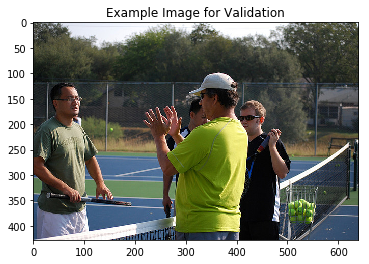%0A)

    2021-08-28 05:25:46,121 | logger_training | INFO: Original caption: some people standing on a court with a racket 
    2021-08-28 05:25:46,122 | logger_training | INFO: Generated caption: a man holding a tennis racquet on a tennis court.
    /opt/conda/lib/python3.6/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
    Corpus/Sentence contains 0 counts of 2-gram overlaps.
    BLEU scores might be undesirable; use SmoothingFunction().
      warnings.warn(_msg)
    2021-08-28 05:25:46,128 | logger_training | INFO: BLEU_1: Cumulative 1-gram: 0.090909
    2021-08-28 05:25:46,129 | logger_training | INFO: BLEU_2: Cumulative 2-gram: 0.301511
    2021-08-28 05:25:46,131 | logger_training | INFO: BLEU_3: Cumulative 3-gram: 0.453253
    2021-08-28 05:25:46,134 | logger_training | INFO: BLEU_4: Cumulative 4-gram: 0.549100

In \[ \]: